# Project 3 - Clustering

<h5 style="font-size: 1.3em;color: #69956e;"> Customer segmentation based on the hotel H’s customer database</h5>
<p>This notebook uses the <em>HotelCustomersDataset.tsv</em> dataset.</p>

<strong>Machine Learning for Marketing 2023/2024</strong>

<strong>Professors:</strong>
- Nuno António
- Ana Edmundo
- Hugo Silva
- Vasco Jesus

<strong>Projet developed by:</strong>
- Anabela Florência, r20201584
- António Cadaixa, r20201505
- Constança Rodrigues, r20201586
- Joana Pimenta, r20201590
- Laura Freitas, 20230172
<br>

<h5 style="font-size: 1.3em;color: #69956e;"> Dataset Description</h5>

- `ID`: Customer ID.
- `Nationality`: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
- `Age`: Customer's age (in years) at the last day of the extraction period.
- `DaysSinceCreation`: Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period.
- `NameHash`: Name of the customer's SHA2–256 hash string. A hash-string is the string resulting from a mathematical function that maps a string of arbitrary length to fixed-length. Hash functions are used for different purposes. In this case, to allow customer's anonymization.
- `DocIDHash`: SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other).
- `AverageLeadTime`: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customers.
- `LodgingRevenue`: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses.
- `OtherRevenue`: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses.
- `BookingsCanceled`: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay).
- `BookingsNoShowed`: Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel).
- `BookingsCheckedIn`: Number of bookings the customer made, and which end up with a staying.
- `PersonsNights`: The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children.
- `RoomNights`: Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the bookings.
- `DaysSinceLastStays`: The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotels.
- `DaysSinceFirstStays`: The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotels.
- `DistributionChannels`: Distribution channel usually used by the customer to make bookings at the hotels.
- `MarketSegments`: Current market segment of the customers.
- `SRHighFloors`: Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes).
- `SRLowFloors`: Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes).
- `SRAccessibleRooms`: Indication if the customer usually asks for an accessible room (0: No, 1: Yes).
- `SRMediumFloors`: Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes).
- `SRBathtubs`: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes).
- `SRShower`:  Indication if the customer usually asks for a room with a shower (0: No, 1: Yes).
- `SRCrib`: Indication if the customer usually asks for a crib (0: No, 1: Yes).
- `SRKingSizeBed`: Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes).
- `SRTwinBed`: Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes).
- `SRNearElevator`: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes).
- `SRAwayFromElevator`: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes).
- `SRNoAlcoholInMiniBar`: Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes).
- `SRQuietRoom`: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).
<br>

<h5 style="font-size: 1.3em; color: #69956e;">Work Description</h5>

<p style="color: #000000;">
Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.

Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.

Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers. 

Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database. </p>

# Initializations and Data Loading

In [1]:
# Load packages
import os
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pointbiserialr
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import SplineTransformer
from feature_engine.creation import CyclicalFeatures
from yellowbrick.regressor import ResidualsPlot, PredictionError
import category_encoders as ce
import pickle
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.vq import whiten
from sklearn.impute import KNNImputer

warnings.filterwarnings('ignore')

# To plot in notebook
%matplotlib inline

In [2]:
# Load the dataset 
ds = pd.read_csv('HotelCustomersDataset.tsv', sep="\t")

# Data Understanding

In [3]:
# Display the top 10 rows - provides an overview of the variables and facilitates data understanding
ds.head(10)

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   
5   6         JPN  54.0               1095   
6   7         JPN  49.0               1095   
7   8         FRA  32.0               1095   
8   9         FRA  42.0               1095   
9  10         IRL  25.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   
5  0x6E70C1504EB27252542F58E4D3C8C83516E093334721...   
6  0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...   
7  0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...   
8  0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...   
9  0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B202DD0820F49407C762C14A603B3A...                0   
5  0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...               58   
6  0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...                0   
7  0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...               38   
8  0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...                0   
9  0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...               96   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   
5           230.0          24.0                 0  ...              0   
6             0.0           0.0                 0  ...              0   
7           535.0          94.0                 0  ...              0   
8             0.0           0.0                 0  ...              0   
9           174.0          69.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   
3          0         0       0              0          0              0   
4          0         0       0              0          0              0   
5          0         0       0              0          0              0   
6          0         0       0              0          0              0   
7          0         0       0              1          0              0   
8          0         0       0              1          0              0   
9          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  
3                  0                     0            0  
4                  0                     0            0  
5                  0                     0            0  
6                  0                   

In [4]:
# More detailed information about the DataFrame and the variables
# Helps to understand the existing types of data and the amount of non-null entries of each variable

def basic_info(ds):
    print("This dataset has ", ds.shape[1], " columns and ", ds.shape[0], " rows.")
    print("This dataset has ", ds[ds.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(ds.info())
basic_info(ds)

This dataset has  31  columns and  83590  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13

In [5]:
# Obtain the amount of missing values per variable
count_missingvalues = pd.DataFrame(ds.isnull().sum(), columns=['Total Null Data']).reset_index()
count_missingvalues[count_missingvalues['Total Null Data'] != 0]

index  Total Null Data
2   Age             3779

In [6]:
# Percentage of column's data missing
percent_missing = ds.isnull().mean() * 100  
missing_value_df = pd.DataFrame(percent_missing, columns=['% of Missing Data']).reset_index()
missing_value_df[missing_value_df['% of Missing Data'] != 0]  

# Conclusion: There are 3779 missing values on the column 'Age', meaning around 4,52% of this column data. 

index  % of Missing Data
2   Age           4.520876

#### Conclusion
The data came from a four-star hotel located in Lisbon, Portugal. All personal related data were transformed or anonymized to guaranty privacy and prevent the hotel or guests’ identification. Time-related variables were accounted for based on the last day of the extraction period. The last day of the extraction period is December 31, 2018.
- The dataset has 31 columns and 83590 observations.
- The variable `Age` presents 3779 null values (corresponding to 4.52% of its observations). 
- There is a predominance of numerical variables (int64, float64). However, there are also 5 object variables.
<br>

## Summary Statistics Analysis

In [7]:
# Summary statistics for object variables, to understand them and check for inconsistencies
ds.describe(include=['object']).T

count unique  \
Nationality          83590    188   
NameHash             83590  80642   
DocIDHash            83590  76993   
DistributionChannel  83590      4   
MarketSegment        83590      7   

                                                                   top   freq  
Nationality                                                        FRA  12422  
NameHash             0xD1490806AB49549565586CE26419163D5EFDD3C607B9...     47  
DocIDHash            0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   3657  
DistributionChannel                              Travel Agent/Operator  68569  
MarketSegment                                                    Other  48039

#### 'Object' Variable Analysis

- `Nationality`: The dataset contains a diverse set of nationalities (188), with France being the most represented ('FRA' - France - has a frequency of 12422). The presence of such preference is an indication that the variable `Nationality` could be useful for segmentation and understanding the geographical distribution of the customers.

- `NameHash`: The most frequent hash appears 47 times. This high number of unique values suggests that `NameHash` is almost unique for each customer, with a few repetitions.
  
- `DocIDHash`: Similar to `NameHash`, `DocIDHash` also has a high number of unique values. The significant frequency of the most common hash suggests there might be some common documents or IDs used multiple times.
  
- `DistributionChannel`: The dataset is heavily skewed towards bookings made through 'Travel Agent/Operator', indicating this is the predominant distribution channel. The other channels are less represented, which could impact marketing strategies and resource allocation.

- `MarketSegment`: A significant portion of the bookings falls into the 'Other' category, which may require further investigation to understand what it encompasses. 

In [8]:
# Summary statistics for numerical variables, to understand them and check for inconsistencies 
ds.describe(include=['number']).T

count          mean           std   min       25%  \
ID                    83590.0  41795.500000  24130.498838   1.0  20898.25   
Age                   79811.0     45.398028     16.572368 -11.0     34.00   
DaysSinceCreation     83590.0    453.640902    313.390291   0.0    177.00   
AverageLeadTime       83590.0     66.196028     87.758990  -1.0      0.00   
LodgingRevenue        83590.0    298.802087    372.851892   0.0     59.00   
OtherRevenue          83590.0     67.589132    114.327776   0.0      2.00   
BookingsCanceled      83590.0      0.002022      0.066770   0.0      0.00   
BookingsNoShowed      83590.0      0.000634      0.029545   0.0      0.00   
BookingsCheckedIn     83590.0      0.794617      0.695778   0.0      1.00   
PersonsNights         83590.0      4.649133      4.567673   0.0      1.00   
RoomNights            83590.0      2.358536      2.281746   0.0      1.00   
DaysSinceLastStay     83590.0    401.067137    347.204955  -1.0     26.00   
DaysSinceFirstStay    83590.0    403.349013    347.971089  -1.0     27.00   
SRHighFloor           83590.0      0.047482      0.212668   0.0      0.00   
SRLowFloor            83590.0      0.001412      0.037546   0.0      0.00   
SRAccessibleRoom      83590.0      0.000251      0.015848   0.0      0.00   
SRMediumFloor         83590.0      0.000873      0.029539   0.0      0.00   
SRBathtub             83590.0      0.002847      0.053284   0.0      0.00   
SRShower              83590.0      0.001711      0.041326   0.0      0.00   
SRCrib                83590.0      0.013219      0.114213   0.0      0.00   
SRKingSizeBed         83590.0      0.352686      0.477809   0.0      0.00   
SRTwinBed             83590.0      0.142541      0.349606   0.0      0.00   
SRNearElevator        83590.0      0.000335      0.018299   0.0      0.00   
SRAwayFromElevator    83590.0      0.003505      0.059101   0.0      0.00   
SRNoAlcoholInMiniBar  83590.0      0.000120      0.010937   0.0      0.00   
SRQuietRoom           83590.0      0.088372      0.283837   0.0      0.00   

                          50%        75%       max  
ID                    41795.5  62692.750  83590.00  
Age                      46.0     57.000    122.00  
DaysSinceCreation       397.0    723.000   1095.00  
AverageLeadTime          29.0    103.000    588.00  
LodgingRevenue          234.0    402.000  21781.00  
OtherRevenue             38.5     87.675   7730.25  
BookingsCanceled          0.0      0.000      9.00  
BookingsNoShowed          0.0      0.000      3.00  
BookingsCheckedIn         1.0      1.000     66.00  
PersonsNights             4.0      6.000    116.00  
RoomNights                2.0      4.000    185.00  
DaysSinceLastStay       366.0    693.000   1104.00  
DaysSinceFirstStay      369.0    697.000   1186.00  
SRHighFloor               0.0      0.000      1.00  
SRLowFloor                0.0      0.000      1.00  
SRAccessibleRoom          0.0      0.000      1.00  
SRMediumFloor             0.0      0.000      1.00  
SRBathtub                 0.0      0.000      1.00  
SRShower                  0.0      0.000      1.00  
SRCrib                    0.0      0.000      1.00  
SRKingSizeBed             0.0      1.000      1.00  
SRTwinBed                 0.0      0.000      1.00  
SRNearElevator            0.0      0.000      1.00  
SRAwayFromElevator        0.0      0.000      1.00  
SRNoAlcoholInMiniBar      0.0      0.000      1.00  
SRQuietRoom               0.0      0.000      1.00

#### 'Number' Variable Analysis

- `ID`: Unique identifier for each customer and does not have any analytical relevance.
  
- `Age`: Has an average of 45.39 years with a standard deviation of 16.57 years. It is noted that the minimum value recorded is -11, which is clearly invalid for an age, and the maximum is 122, which is unusually high.

- `DaysSinceCreation` : Has a mean of 453.64 days with a standard deviation of 313.39 days. The values range from 0 to 1095 days and the quartiles are 177 (25th percentile), 397 (median), and 723 (75th percentile), suggesting a broad distribution of reservation creation times.

- `AverageLeadTime`: This variable shows an average of 66.19 days with a standard deviation of 87.76 days. The minimum value is -1, which is invalid, and the maximum is 588 days. The quartiles are 9 (25th percentile), 30 (median), and 103 (75th percentile), indicating that most reservations are made with a lead time of up to 103 days. The negative value needs to be addressed, and unusually high values should be reviewed for accuracy.

- `LodgingRevenue`: Has an average of 298.80 with a significant standard deviation of 372.85. The values range from 0 to 21781, indicating a wide variation in the variable. There might be outliers that should be investigated further.

- `OtherRevenue`: Has an average of 67.59 with a standard deviation of 114.33. The values range from 0 to 7730.25, suggesting significant variation and potential outliers.

- `BookingsCanceled`: Has a very low average (0.002) and standard deviation (0.0668), indicating that cancellations are rare. Most values are zero, with quartiles all being zero. This suggests that the variable may not need much preprocessing.

- `BookingsNoShowed`: Have very low averages (0.002 and 0.0006, respectively) with corresponding low standard deviations, indicating that most bookings were not canceled or showed.

- `BookingsCheckedIn`: Has a high average of 0.79, showing that most bookings resulted in check-ins. The standard deviation is 0.6958, with values ranging from 0 to 66. The high value needs to be investigated for possible data entry errors.

- `PersonsNights` and `RoomNights`: Indicate averages of 4.65 and 2.36, respectively, which values are also very close to their median (50th percentile), suggesting a normal distribution and pattern for the customer's stays. However, their maximum values of 116 and 185, respectively, may required further exploration regarding the possibility of existing outliers.

- `DaysSinceLastStay` and `DaysSinceFirstStay`: Both show significant averages (401.07 and 403.34 days, respectively) and wide ranges, indicating varying lengths of customer relationships. Also, they have negative values that should be investigated.

- Variables like `SRHighFloor`, `SRLowFloor`, `SRAccessibleRoom`, and others related to room preferences have low averages, indicating that specific requests are relatively rare. These variables are mostly binary (0 or 1), with a few having higher maximum values that should be verified for accuracy. The quartiles are almost all 0. 

In [9]:
# Unique values in the 'DistributionChannel' column
channel_unique = ds['DistributionChannel'].unique()
print("Unique values in DistributionChannel:", channel_unique)
print("")
print("Value counts for DistributionChannel:")
print(ds['DistributionChannel'].value_counts())

Unique values in DistributionChannel: ['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']

Value counts for DistributionChannel:
DistributionChannel
Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: count, dtype: int64


In [10]:
# Unique values in the 'MarketSegment' column
marketsegment_unique = ds['MarketSegment'].unique()
print("Unique values in MarketSegment:", marketsegment_unique)
print("")
print("Value counts for MarketSegment:")
print(ds['MarketSegment'].value_counts())

Unique values in MarketSegment: ['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']

Value counts for MarketSegment:
MarketSegment
Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: count, dtype: int64


#### Other Considerations
We might consider grouping less frequent segments into a broader category. For example, 'Complementary' and 'Aviation' could be combined since they represent a small portion of the dataset.

## Correlation Analysis

### Correlation Matrix Heatmap Analysis

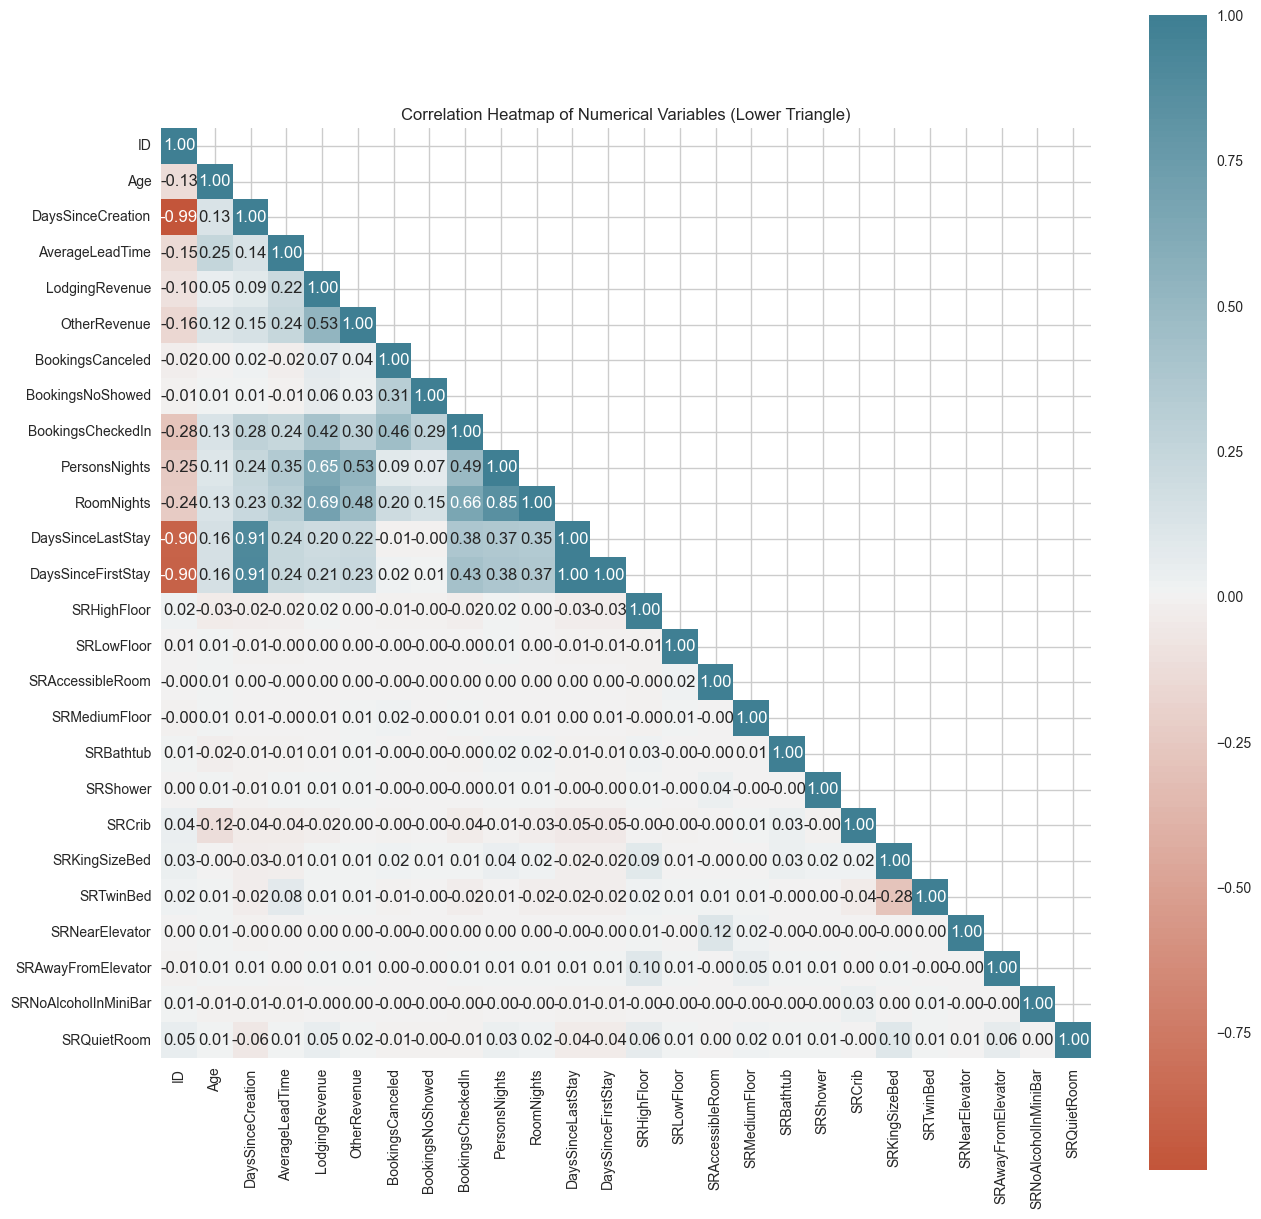

In [11]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns
numerical_ds = ds.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_ds.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

#### Conclusion

**Strong Positive Correlations:**
- The correlations among `DaysSinceLastStay` and `DaysSinceFirstStay` with `DaysSinceCreation` are almost perfect, indicating these variables are closely related.
- `PersonsNights` and `RoomNights` have a high positive correlation, indicating that more person nights generally mean more room nights booked.

**Strong Negative Correlations:**
- There are no strong negative correlations.


**Low Correlations:**
- Many variables show low correlations with each other, suggesting they are relatively independent.

# Data Visualization

In [12]:
#Defining the color palette to use in the visualizations
color1 = my_palette[199]
color2 = my_palette[150]
color3 = my_palette[100]
color4 = my_palette[50]
color5 = my_palette[1]

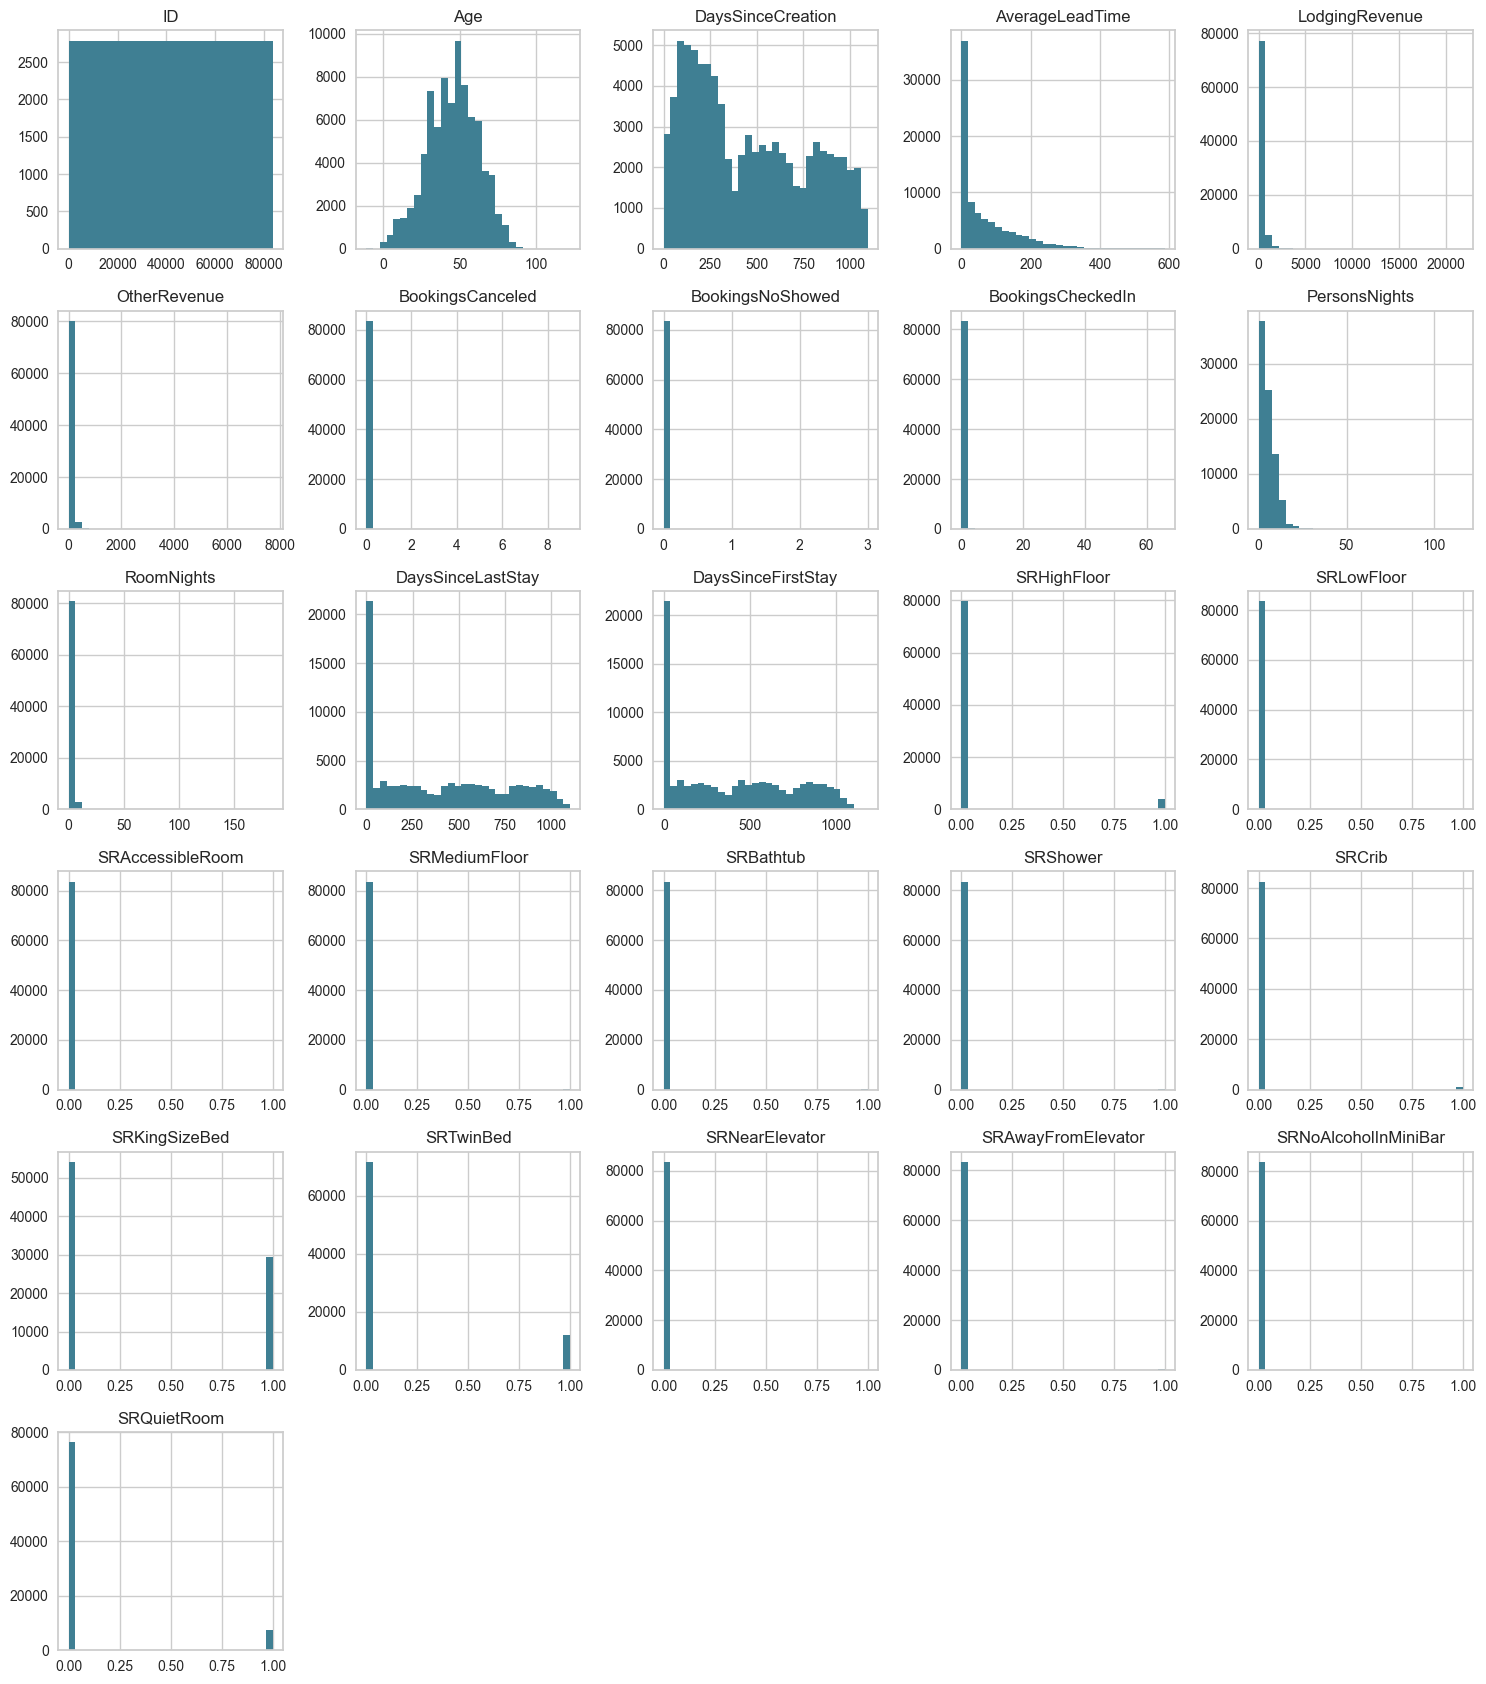

In [13]:
# Plot the distribution of each variable

ds.hist(figsize=(15, 17), bins=30, color=color1)
plt.tight_layout()
plt.show()

In [14]:
# Given our previous suspicion of outliers, we will divide the 'LodgingRevenue' variable into bins to analyze its distribution.

min_revenue = ds['LodgingRevenue'].min()
max_revenue = ds['LodgingRevenue'].max()

#Deciding to devide LodgingRevenue into 5 different bins - considering the previous histogram 
num_bins = 5 

bins = pd.cut(ds['LodgingRevenue'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of LodgingRevenue:")
print(bin_counts)

Intervals of LodgingRevenue:
LodgingRevenue
(-21.781, 4356.2]     83557
(4356.2, 8712.4]         28
(8712.4, 13068.6]         4
(13068.6, 17424.8]        0
(17424.8, 21781.0]        1
Name: count, dtype: int64


#### Conclusion
The output suggests that most `LodgingRevenue` values fall into the (-21.781, 4356.2] interval, indicating a heavily right-skewed distribution, consistent with the histogram visualizations. Additionally, the few values in the higher revenue ranges confirm our suspicions of outliers or rare occurrences.
<br>

In [15]:
# Repeating the previous step (creation of bins), but now for the variable 'OtherRevenue'

min_revenue = ds['OtherRevenue'].min()
max_revenue = ds['OtherRevenue'].max()

num_bins = 6

bins = pd.cut(ds['OtherRevenue'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of OtherRevenue:")
print(bin_counts)

Intervals of OtherRevenue:
OtherRevenue
(-7.73, 1288.375]      83517
(1288.375, 2576.75]       64
(2576.75, 3865.125]        6
(3865.125, 5153.5]         2
(5153.5, 6441.875]         0
(6441.875, 7730.25]        1
Name: count, dtype: int64


#### Conclusion
Similar to `LodgingRevenue`, the output suggests that most `OtherRevenue` values fall into the (-7.73, 1288.375] interval, indicating a heavily right-skewed distribution, consistent with the histogram visualizations. Additionally, the few values in the higher revenue ranges confirm our suspicions of outliers or rare occurrences.
<br>

In [16]:
# Repeating the previous step (creation of bins), but now for the variable 'BookingsCanceled' 

min_revenue = ds['BookingsCanceled'].min()
max_revenue = ds['BookingsCanceled'].max()

num_bins = 5

bins = pd.cut(ds['BookingsCanceled'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of BookingsCanceled:")
print(bin_counts)

Intervals of BookingsCanceled:
BookingsCanceled
(-0.009, 1.8]    83564
(1.8, 3.6]          20
(3.6, 5.4]           5
(5.4, 7.2]           0
(7.2, 9.0]           1
Name: count, dtype: int64


#### Conclusion
Similar to the previous variables, the output suggests that most `BookingsCanceled` values fall into the (-0.009, 1.8] interval.
<br>

In [17]:
#  Repeating the previous step (creation of bins), but now for the variable 'BookingsNoShowed'

min_revenue = ds['BookingsNoShowed'].min()
max_revenue = ds['BookingsNoShowed'].max()

num_bins = 6

bins = pd.cut(ds['BookingsNoShowed'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of BookingsNoShowed:")
print(bin_counts)

Intervals of BookingsNoShowed:
BookingsNoShowed
(-0.003, 0.5]    83546
(0.5, 1.0]          36
(1.0, 1.5]           0
(1.5, 2.0]           7
(2.0, 2.5]           0
(2.5, 3.0]           1
Name: count, dtype: int64


#### Conclusion
Similar to the previous variables, the output suggests that most `BookingsNoShowed` values fall into the (-0.003, 0.5] interval.
<br>

In [18]:
# Repeating the previous step (creation of bins), but now for the variable 'BookingsCheckedIn'

min_revenue = ds['BookingsCheckedIn'].min()
max_revenue = ds['BookingsCheckedIn'].max()

num_bins = 5

bins = pd.cut(ds['BookingsCheckedIn'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of BookingsCheckedIn:")
print(bin_counts)

Intervals of BookingsCheckedIn:
BookingsCheckedIn
(-0.066, 13.2]    83569
(13.2, 26.4]         14
(26.4, 39.6]          4
(39.6, 52.8]          1
(52.8, 66.0]          2
Name: count, dtype: int64


#### Conclusion
Similar to the previous variables, the output suggests that most `BookingsCheckedIn` values fall into the (-0.003, 0.5] interval.
<br>

In [19]:
#  Repeating the previous step (creation of bins), but now for the variable 'PersonsNights'

min_revenue = ds['PersonsNights'].min()
max_revenue = ds['PersonsNights'].max()

num_bins = 5

bins = pd.cut(ds['PersonsNights'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of PersonsNights:")
print(bin_counts)

Intervals of PersonsNights:
PersonsNights
(-0.116, 23.2]    83190
(23.2, 46.4]        386
(46.4, 69.6]         10
(69.6, 92.8]          3
(92.8, 116.0]         1
Name: count, dtype: int64


#### Conclusion
Similar to the previous variables, the output suggests that most `PersonsNights` values fall into the (-0.116, 23.2] interval, indicating a right-skewed distribution.
<br>

In [20]:
#  Repeating the previous step (creation of bins), but now for the variable 'RoomNights' 

min_revenue = ds['RoomNights'].min()
max_revenue = ds['RoomNights'].max()

num_bins = 3

bins = pd.cut(ds['RoomNights'], bins=num_bins)

bin_counts = bins.value_counts().sort_index()

print("Intervals of RoomNights:")
print(bin_counts)

Intervals of RoomNights:
RoomNights
(-0.185, 61.667]     83585
(61.667, 123.333]        4
(123.333, 185.0]         1
Name: count, dtype: int64


#### Conclusion
Similar to the previous variables, the output suggests that most `RoomNights` values fall into the (-0.003, 0.5] interval.
<br>

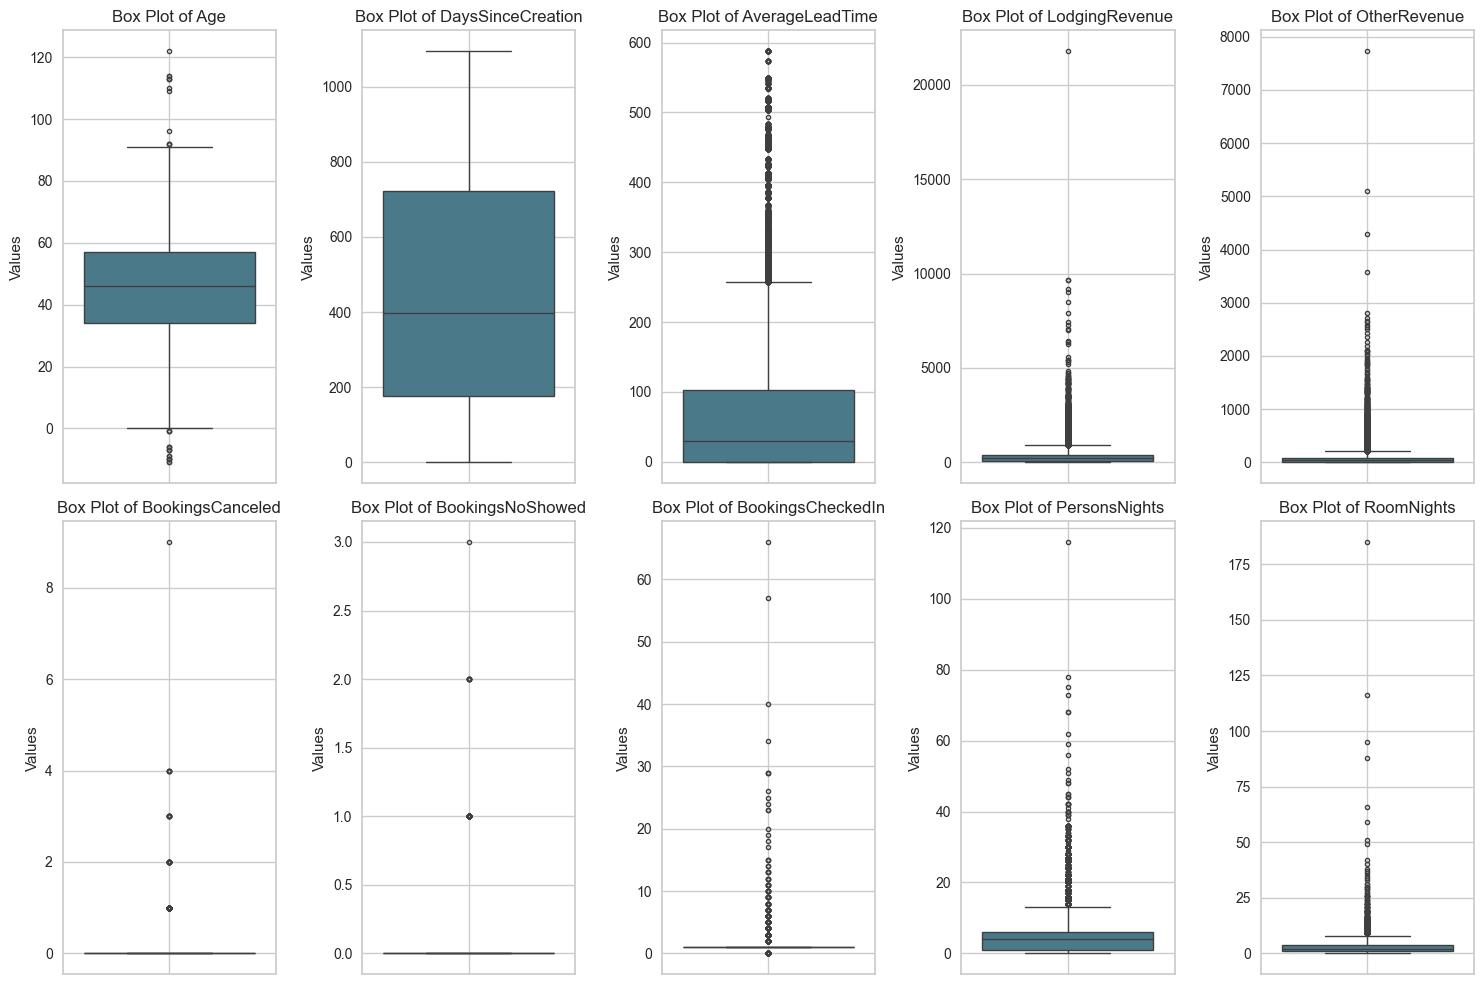

In [21]:
# Compute the Box Plot to analyze outliers

exclude_columns = ['ID', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRLowFloor', 'SRAccessibleRoom', 'SRHighFloor', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns, errors='ignore')

num_cols = 5 
num_rows = (len(numerical_columns.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
for i, col in enumerate(numerical_columns.columns):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=ds[col], color=color1, fliersize=3)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel('Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [22]:
variables_w_outliers = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights']

results = {}
resultsout = {}

for var in variables_w_outliers:
    q1 = ds[var].quantile(0.25)
    q3 = ds[var].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    below_lower_bound = ds[ds[var] < lower_bound].shape[0]
    above_upper_bound = ds[ds[var] > upper_bound].shape[0]
    
    results[var] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,       
    }
    resultsout[var] = {
        'Below Lower Bound': below_lower_bound,
        'Above Upper Bound': above_upper_bound
    }

results_df = pd.DataFrame(results).transpose()
resultsout_df = pd.DataFrame(resultsout).transpose()

print(results_df)
print(resultsout_df)

                   Lower Bound  Upper Bound
Age                    -0.5000      91.5000
AverageLeadTime      -154.5000     257.5000
LodgingRevenue       -455.5000     916.5000
OtherRevenue         -126.5125     216.1875
BookingsCanceled        0.0000       0.0000
BookingsNoShowed        0.0000       0.0000
BookingsCheckedIn       1.0000       1.0000
PersonsNights          -6.5000      13.5000
RoomNights             -3.5000       8.5000
                   Below Lower Bound  Above Upper Bound
Age                               17                 12
AverageLeadTime                    0               3408
LodgingRevenue                     0               3900
OtherRevenue                       0               5057
BookingsCanceled                   0                118
BookingsNoShowed                   0                 44
BookingsCheckedIn              19920               1455
PersonsNights                      0               3925
RoomNights                         0                655


#### Conclusion
In alignment with previous conclusions, now we can verify that...
1. The variable `Age` has 17 people with age lower than -0.5 and 12 people with age over 92. These values should be treated, as they may represent entry errors.
3. In `AverageLeadTime` most values are below 258 days, but there are many outliers extending up to 588 days. We pottential will cap extremely these high lead times.
4. While there are notable outliers in the `LodgingRevenue`and `OtherRevenue` variables, the nature of this income distributions inherently includes significant variance. This distributions are heavily skewed with a long tail, and have significant outliers.
5. `BookingsCheckedIn` shows a high concentration around the median of 1, with a lot of outliers, which seems unusually high.

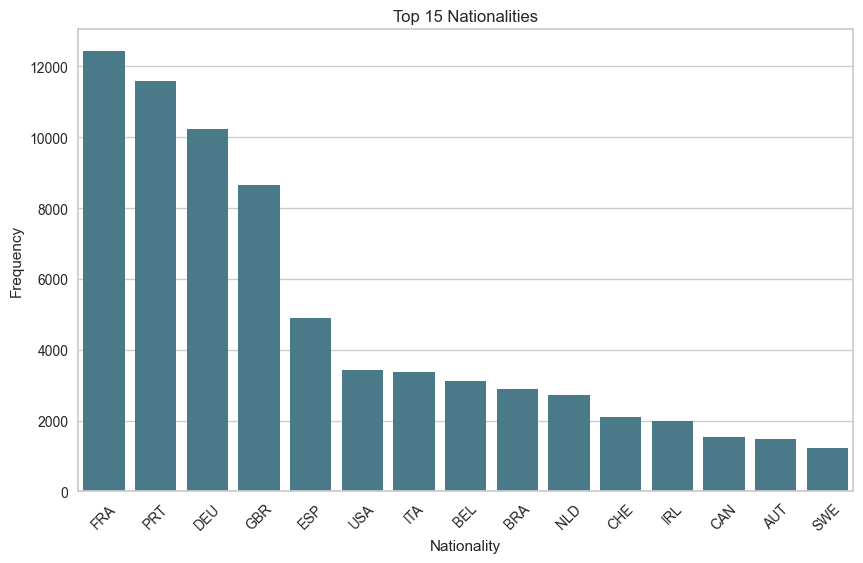

In [23]:
# Bar Chart for yop 15 Nationalities
top_nationalities = ds['Nationality'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, color=color1)
plt.title('Top 15 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

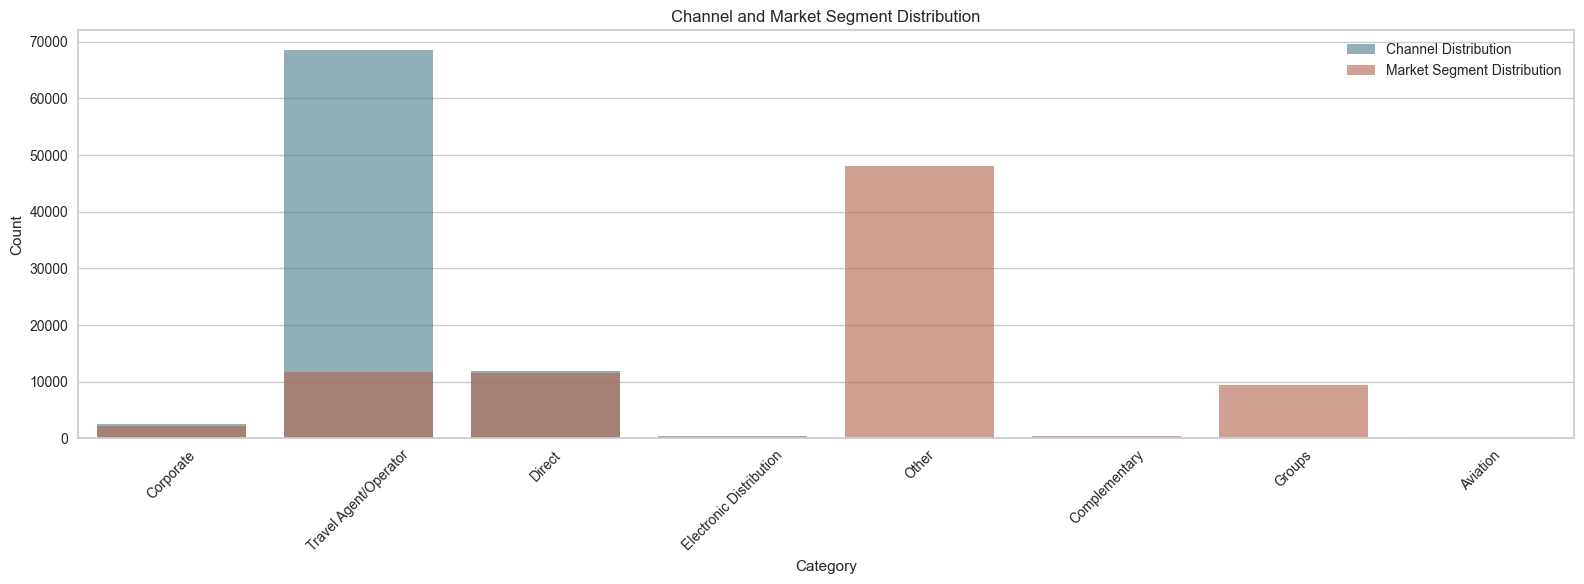

In [24]:
# Plot for 'Distribution Channel' and 'Market Segment'

fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data=ds, x='DistributionChannel', ax=ax, color=color1, label='Channel Distribution', alpha=0.6)
sns.countplot(data=ds, x='MarketSegment', ax=ax, color=color5, label='Market Segment Distribution', alpha=0.6)

ax.set_title('Channel and Market Segment Distribution')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

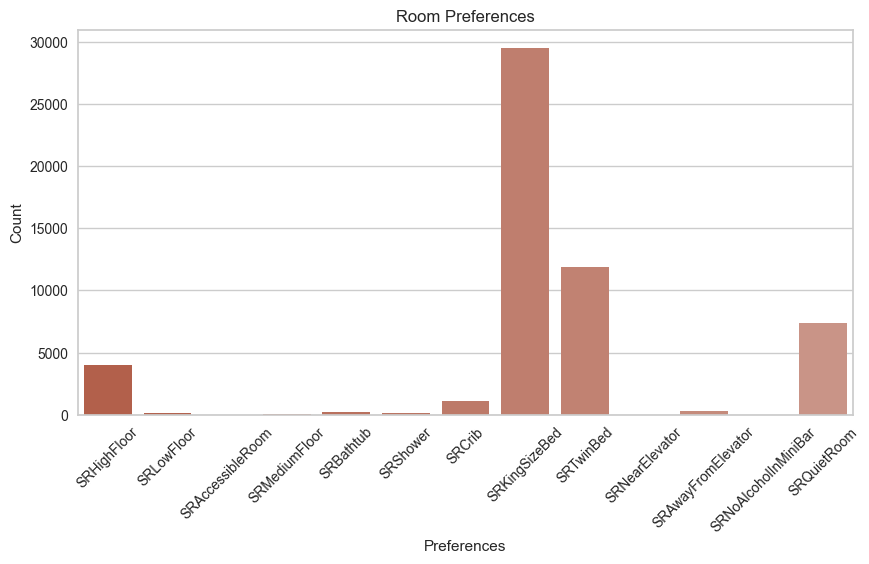

In [25]:
# Bar Chart for Room Preferences

# List of room preference columns to visualize
room_preferences = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 
    'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 
    'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 
    'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'
]

colors1 = [my_palette[int(x)] for x in range(0, 200, 50 // len(room_preferences))]

# Calculate the sum of each room preference to get the counts
room_pref_counts = ds[room_preferences].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=room_pref_counts.index, y=room_pref_counts.values, palette=colors1)
plt.title('Room Preferences')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

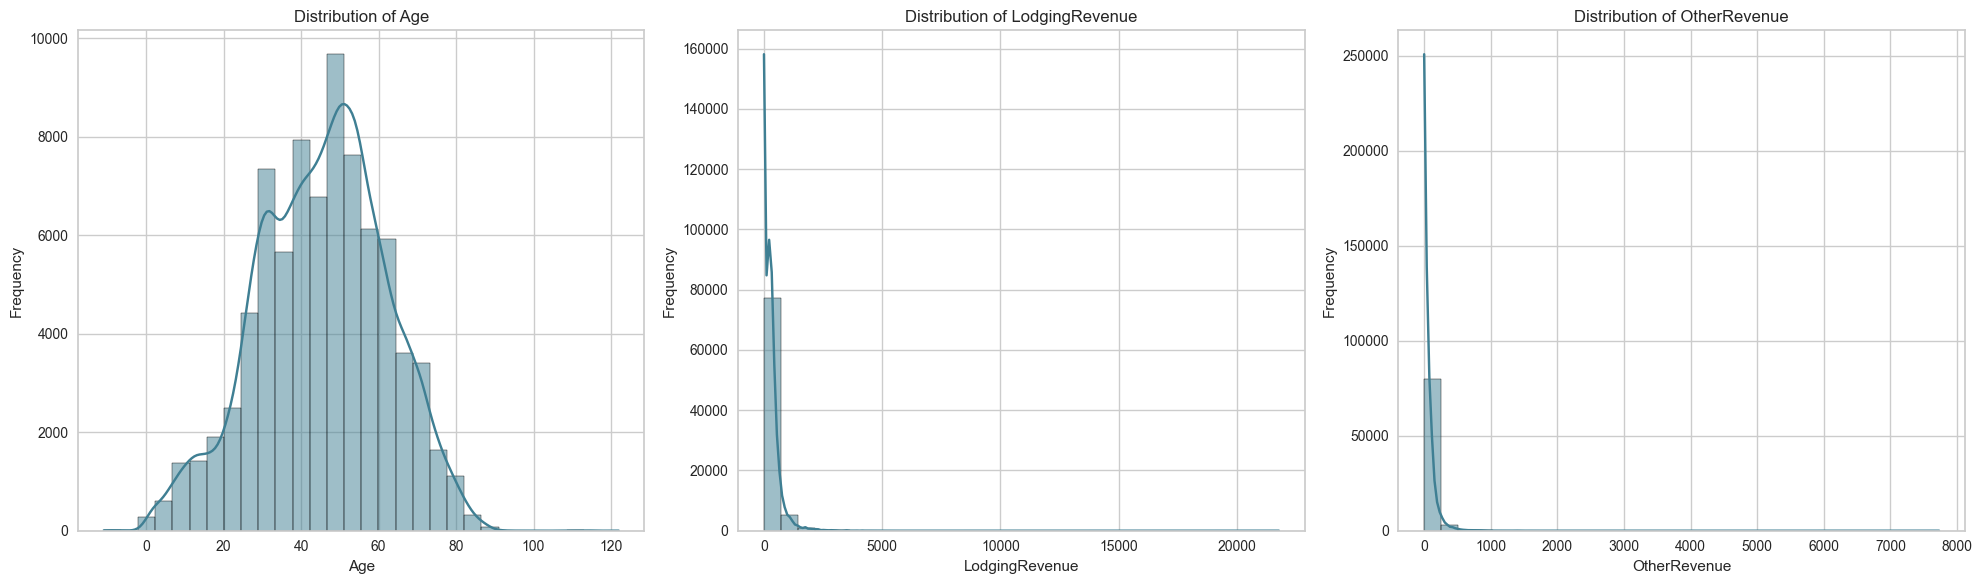

In [26]:
plt.figure(figsize=(20, 6))

# Distribution of 'Age'
plt.subplot(1, 3, 1)
sns.histplot(ds['Age'], bins=30, kde=True, color=color1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Distribution of 'LodgingRevenue'
plt.subplot(1, 3, 2)
sns.histplot(ds['LodgingRevenue'], bins=30, kde=True, color=color1)
plt.title('Distribution of LodgingRevenue')
plt.xlabel('LodgingRevenue')
plt.ylabel('Frequency')

# Distribution of 'OtherRevenue'
plt.subplot(1, 3, 3)
sns.histplot(ds['OtherRevenue'], bins=30, kde=True, color=color1)
plt.title('Distribution of OtherRevenue')
plt.xlabel('OtherRevenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
# Filter the rows where none of the booking statuses are nonzero
no_status_reservations = ds[
    (ds['BookingsCheckedIn'] == 0) &
    (ds['BookingsCanceled'] == 0) &
    (ds['BookingsNoShowed'] == 0) &
    (ds['AverageLeadTime'] != 0)
]

# Count the occurrences
count_no_status_reservations = len(no_status_reservations)

print(f"Number of reservations with no status (neither checked in, canceled, nor no-showed): {count_no_status_reservations}")

no_status_reservations.head(10)

Number of reservations with no status (neither checked in, canceled, nor no-showed): 0


Empty DataFrame
Columns: [ID, Nationality, Age, DaysSinceCreation, NameHash, DocIDHash, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, DaysSinceLastStay, DaysSinceFirstStay, DistributionChannel, MarketSegment, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom]
Index: []

[0 rows x 31 columns]

#### Conclusion
The query returned zero results, indicating that there are no reservations in the dataset where none of the booking statuses (checked in, canceled, or no-showed) are nonzero, while the average lead time is not zero. This suggests that every reservation in the dataset either has a booking status recorded or has a lead time of zero, meaning it has not happen yet.

In [28]:
# Variables to check for zero values
vars_to_check = ['LodgingRevenue', 'OtherRevenue']

# Count the number of times each variable is zero
zero_counts = (ds[vars_to_check] == 0).sum()

# Calculate the percentage of zero values
total_counts = len(ds)
zero_percentages = (zero_counts / total_counts) * 100

# Display the counts and percentages
print("Number of times each variable is zero and their percentage of the total:")
for var, count, percentage in zip(vars_to_check, zero_counts, zero_percentages):
    print(f"{var}: {count} times, {percentage:.2f}% of the total")

Number of times each variable is zero and their percentage of the total:
LodgingRevenue: 20408 times, 24.41% of the total
OtherRevenue: 20214 times, 24.18% of the total


In [29]:
# Filter the rows where LodgingRevenue is zero
lodging_revenue_zero = ds[ds['LodgingRevenue'] == 0]

# Calculate the count of each booking status when LodgingRevenue is zero
checked_in_lodging_zero = (lodging_revenue_zero['BookingsCheckedIn'] > 0).sum()
canceled_lodging_zero = (lodging_revenue_zero['BookingsCanceled'] > 0).sum()
noshow_lodging_zero = (lodging_revenue_zero['BookingsNoShowed'] > 0).sum()
no_status_lodging_zero = ((lodging_revenue_zero['BookingsCheckedIn'] == 0) & (lodging_revenue_zero['BookingsCanceled'] == 0) & (lodging_revenue_zero['BookingsNoShowed'] == 0)).sum()

# Calculate the total number of instances where LodgingRevenue is zero
total_lodging_revenue_zero = len(lodging_revenue_zero)

# Calculate the percentage of each booking status when LodgingRevenue is zero
checked_in_lodging_zero_percentage = (checked_in_lodging_zero / total_lodging_revenue_zero) * 100
canceled_lodging_zero_percentage = (canceled_lodging_zero / total_lodging_revenue_zero) * 100
noshow_lodging_zero_percentage = (noshow_lodging_zero / total_lodging_revenue_zero) * 100
no_status_lodging_zero_percentage = (no_status_lodging_zero / total_lodging_revenue_zero) * 100

# Print the results
print(f"LodgingRevenue zero values count: {total_lodging_revenue_zero}")
print("\nNumber of times each booking status occurs when LodgingRevenue is zero and their percentage of the total:")
print(f"BookingsCheckedIn: {checked_in_lodging_zero} times, {checked_in_lodging_zero_percentage:.2f}%")
print(f"BookingsCanceled: {canceled_lodging_zero} times, {canceled_lodging_zero_percentage:.2f}%")
print(f"BookingsNoShowed: {noshow_lodging_zero} times, {noshow_lodging_zero_percentage:.2f}%")
print(f"No booking status: {no_status_lodging_zero} times, {no_status_lodging_zero_percentage:.2f}%")

# Filter the rows where OtherRevenue is zero
other_revenue_zero = ds[ds['OtherRevenue'] == 0]

# Calculate the count of each booking status when OtherRevenue is zero
checked_in_other_zero = (other_revenue_zero['BookingsCheckedIn'] > 0).sum()
canceled_other_zero = (other_revenue_zero['BookingsCanceled'] > 0).sum()
noshow_other_zero = (other_revenue_zero['BookingsNoShowed'] > 0).sum()
no_status_other_zero = ((other_revenue_zero['BookingsCheckedIn'] == 0) & (other_revenue_zero['BookingsCanceled'] == 0) & (other_revenue_zero['BookingsNoShowed'] == 0)).sum()

# Calculate the total number of instances where OtherRevenue is zero
total_other_revenue_zero = len(other_revenue_zero)

# Calculate the percentage of each booking status when OtherRevenue is zero
checked_in_other_zero_percentage = (checked_in_other_zero / total_other_revenue_zero) * 100
canceled_other_zero_percentage = (canceled_other_zero / total_other_revenue_zero) * 100
noshow_other_zero_percentage = (noshow_other_zero / total_other_revenue_zero) * 100
no_status_other_zero_percentage = (no_status_other_zero / total_other_revenue_zero) * 100

# Print the results
print(f"\nOtherRevenue zero values count: {total_other_revenue_zero}")
print("\nNumber of times each booking status occurs when OtherRevenue is zero and their percentage of the total:")
print(f"BookingsCheckedIn: {checked_in_other_zero} times, {checked_in_other_zero_percentage:.2f}%")
print(f"BookingsCanceled: {canceled_other_zero} times, {canceled_other_zero_percentage:.2f}%")
print(f"BookingsNoShowed: {noshow_other_zero} times, {noshow_other_zero_percentage:.2f}%")
print(f"No booking status: {no_status_other_zero} times, {no_status_other_zero_percentage:.2f}%")


LodgingRevenue zero values count: 20408

Number of times each booking status occurs when LodgingRevenue is zero and their percentage of the total:
BookingsCheckedIn: 488 times, 2.39%
BookingsCanceled: 14 times, 0.07%
BookingsNoShowed: 0 times, 0.00%
No booking status: 19919 times, 97.60%

OtherRevenue zero values count: 20214

Number of times each booking status occurs when OtherRevenue is zero and their percentage of the total:
BookingsCheckedIn: 294 times, 1.45%
BookingsCanceled: 9 times, 0.04%
BookingsNoShowed: 0 times, 0.00%
No booking status: 19919 times, 98.54%


#### Conclusion

1. **No Booking Status, No Revenue:**
   - **Explanation:** In most cases (97.60% for `LodgingRevenue`, 98.54% for `OtherRevenue`), there's neither a booking status nor revenue recorded, indicating that reservations have not yet been utilized or finalized. These instances may involve bookings made for future dates, pending confirmations, or reservations held without immediate payment, resulting in zero revenue until the stay occurs. <br></br>
     
2. **BookingsCheckedIn with Zero Revenue:**
   - **Explanation:** Despite guests checking in, revenue remains zero (2.39% for `LodgingRevenue`, 1.45% for `OtherRevenue`). This could happen when guests avail promotional offers, complimentary stays, or rewards programs, leading to zero monetary transactions despite using the accommodation. <br></br>
     
3. **BookingsCanceled with Zero Revenue:**
   - **Explanation:** Instances where bookings are canceled without generating revenue (0.07% for `LodgingRevenue`, 0.04% for `OtherRevenue`) may occur due to changes in plans, booking errors, or cancellations within the allowed timeframe for a full refund.

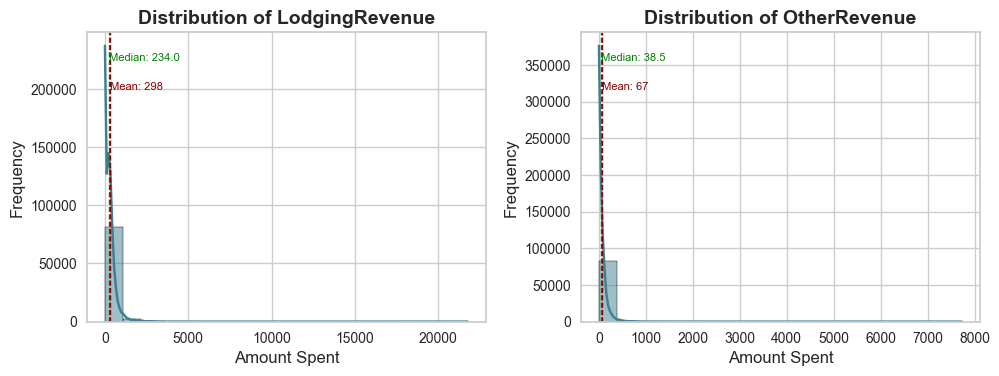

In [30]:
# Distribution of amount spent on products

product_columns = ['LodgingRevenue','OtherRevenue']

plt.figure(figsize=(15, 7))

for i, col in enumerate(product_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=ds, x=col, bins=20, kde=True, color=color1, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Amount Spent', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    median_value = ds[col].median()
    mean_value = ds[col].mean()

    # Display the median as a vertical line
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
    plt.text(median_value + 5, plt.ylim()[1] * 0.9, f'Median: {median_value}', color = 'green', fontsize=8)

    # Display the mean as a vertical line
    plt.axvline(mean_value, color='darkred', linestyle='dashed', linewidth=1)
    plt.text(mean_value + 5, plt.ylim()[1] * 0.8, f'Mean: {int(mean_value)}', color = 'darkred', fontsize=8)

plt.tight_layout() 
plt.show()

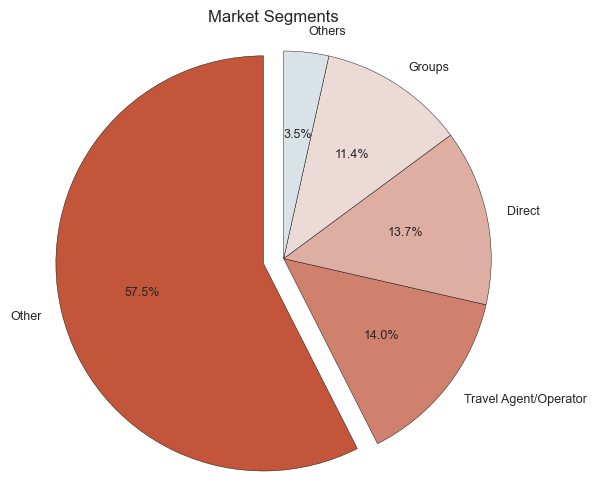

In [31]:
# Calculate the counts of each 'Market Segment'

market_segment_counts = ds['MarketSegment'].value_counts()
top_categories = market_segment_counts.head(4)
others_count = market_segment_counts.iloc[4:].sum()
top_categories['Others'] = others_count

colors2 = [my_palette[int(x)] for x in range(0, 200, 200 // len(market_segment_counts))]

plt.figure(figsize=(6, 6))
plt.pie(
    top_categories, 
    labels=top_categories.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors2, 
    explode=[0.1 if top_categories.idxmax() == category else 0 for category in top_categories.index], 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 9}
)

plt.title('Market Segments')
plt.axis('equal') 
plt.show()

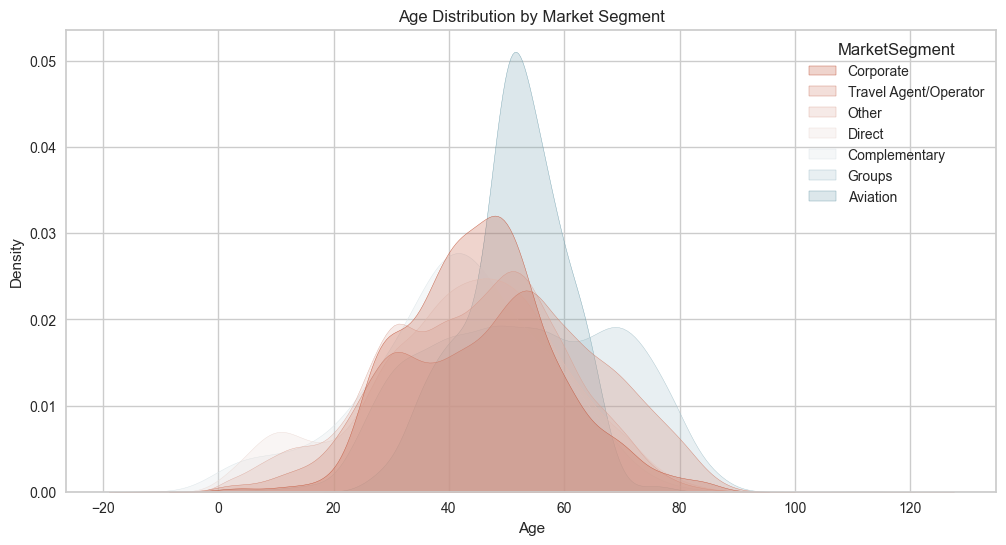

In [32]:
# 'Age' distribution by 'Market Segment'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=ds, x='Age', hue='MarketSegment', fill=True, common_norm=False, palette=colors2)
plt.title('Age Distribution by Market Segment')
plt.xlabel('Age')

plt.ylabel('Density')
plt.show()

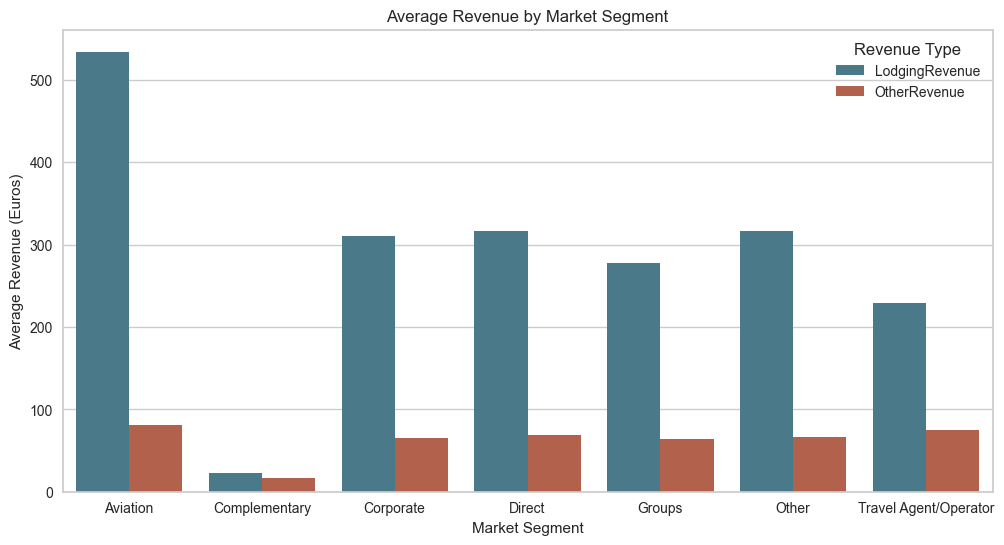

In [33]:
# Calculate average revenues by 'Market Segment'

avg_revenues = ds.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].mean().reset_index()

plt.figure(figsize=(12, 6))
avg_revenues_melted = avg_revenues.melt(id_vars='MarketSegment', var_name='RevenueType', value_name='AverageRevenue')
sns.barplot(x='MarketSegment', y='AverageRevenue', hue='RevenueType', data=avg_revenues_melted, palette=[color1, color5])
plt.title('Average Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Revenue (Euros)')
plt.legend(title='Revenue Type')
plt.show()

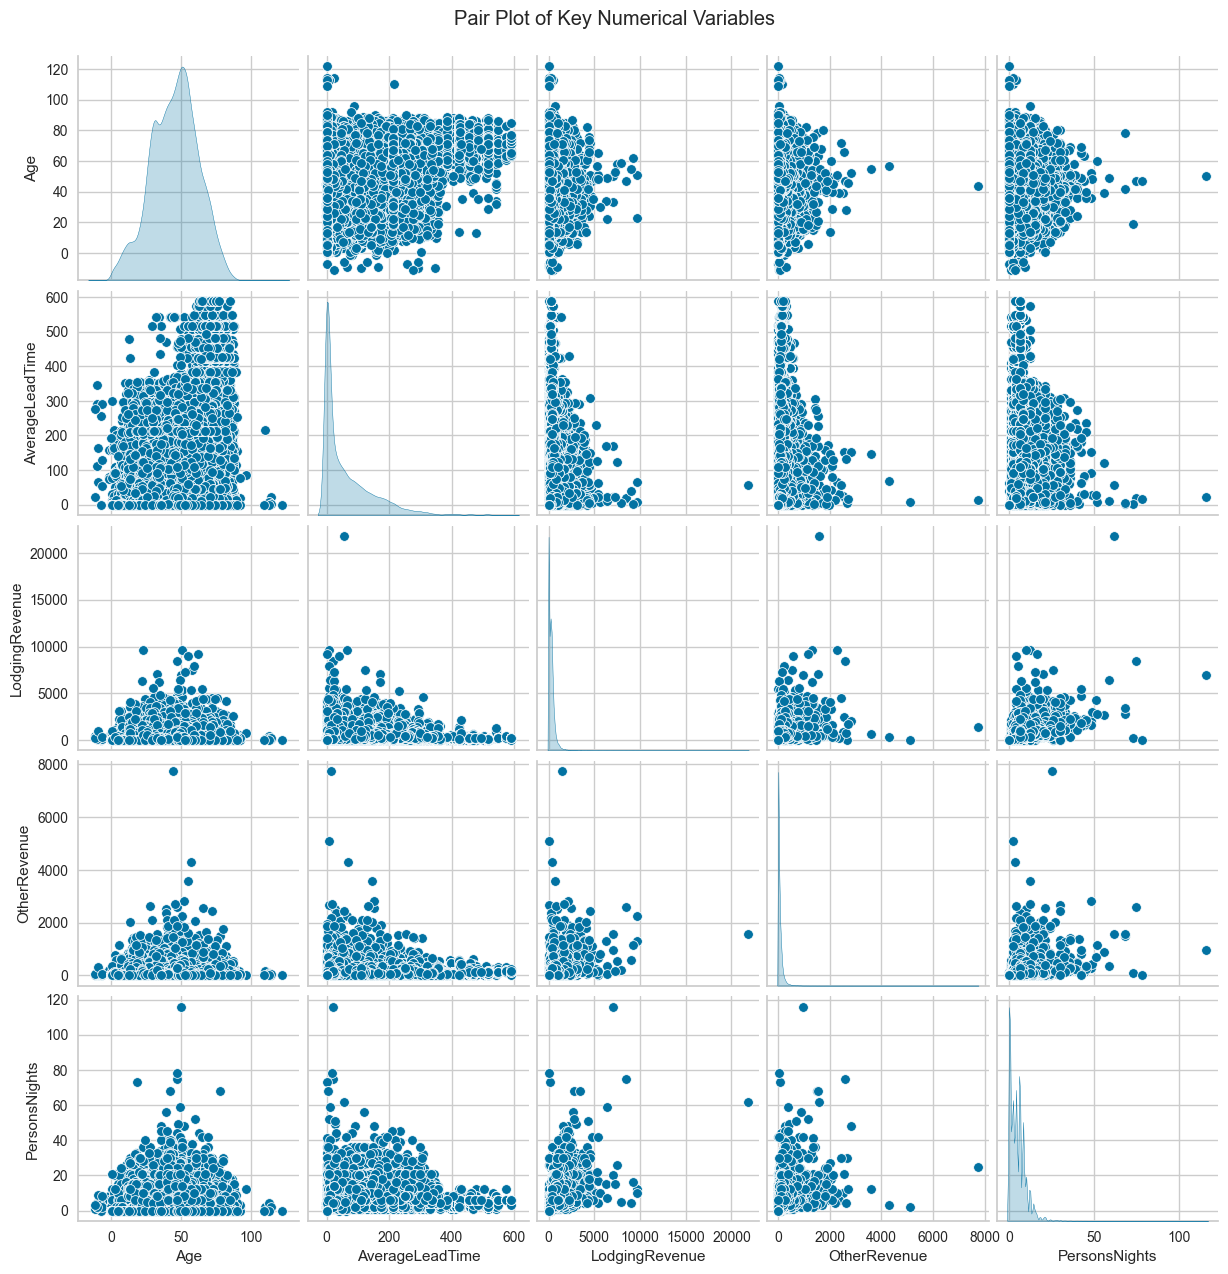

In [34]:
# Pair Plot of Key Numerical Variables

numerical_columns_for_plotting = ['Age', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights']

# Pair plot
sns.pairplot(ds[numerical_columns_for_plotting], diag_kind='kde', palette=color1)
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()

# Data Preparation

In [35]:
# Create a copy of the original dataset to ensure that all subsequent changes are made on the duplicated dataset
X = ds.copy(deep=True)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [37]:
# Check for any duplicated rows
duplicated_rows = X.duplicated().sum()
print("Duplicated Rows:", duplicated_rows)

Duplicated Rows: 0


In [38]:
# Count unique IDs and DocIDHash
# The number should be the same to ensure that every person is just counted once, even if they went to the hotel multiple times
unique_id_count = X['ID'].nunique()
unique_docid_count = X['DocIDHash'].nunique()

# Based on Data Understanding stage, let's check for DocIDHash values that are repeated in the original dataset
repeated_docid_hashes = X['DocIDHash'].value_counts()
repeated_docid_hashes = repeated_docid_hashes[repeated_docid_hashes > 1]

# Display the repeated DocIDHash values
repeated_docid_hashes_list = repeated_docid_hashes.index.tolist()
print("Repeated DocIDHash values:")
print(repeated_docid_hashes)

# Display entries with repeated DocIDHash values
repeated_entries = X[X['DocIDHash'].isin(repeated_docid_hashes_list)]

unique_id_count, unique_docid_count, repeated_docid_hashes.shape[0], repeated_entries.shape[0]

Repeated DocIDHash values:
DocIDHash
0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA    3657
0xFDBABC6688FD5F6B0E1CB119E1676C228066AC1545D0B4DA3B3C8B10B3091210      25
0x154DDC115DF524006203F0A7F59DE028542EC307149BF7F20E37B9D4502B89BD      18
0x101976BA2149F74CDA4CF21A2C01494D789D58168A6FEE8E9EA921C369504064      13
0x52911ACD341A0489025445B361A0EBF49CDC76B2D3DBC0CF6CDBF2F5DD1F5C22      12
                                                                      ... 
0x43EDF4D8AC5722D6D7ACD357F21FA19044633CDBE43016D5ABE60DF5502F735A       2
0x382FA94F9FD0C152D22D094BDBCA2BADA0E1F6D5E44A4E7B15EFD984C88A7B3B       2
0x450018903FC2A9B9B7DF9A9A34F8A74D4945366E9A4B6C264FEB3C2787355B61       2
0xF36EEDD4FB863F4C1208DAC01BB76869273FBE8D03602CC63D46F831838D2F1F       2
0x1AE060094AFC38329E62A706779CC8D5075AFDE64D53E21EDBD1D26C965D1026       2
Name: count, Length: 2254, dtype: int64


(83590, 76993, 2254, 8851)

#### Conclusion
The number of unique DocIDHash values is lower than the number of unique IDs, indicating that some individuals (IDs) are associated with multiple DocIDHash values. The repeated DocIDHash values suggest that some individuals visited the hotel multiple times.
The significant number of repeated DocIDHash values (2,254) and the corresponding entries (8,851) should be investigated further to understand their impact on any subsequent analysis or segmentation.
The most frequent DocIDHash value appears 3,657 times, indicating a potential issue with data duplication.

In [39]:
# The following code performs a series of aggregation operations on our DataFrame grouped by DocIDHash.
# It ensures important columns like 'Nationality', 'Age', and 'DistributionChannel' are properly handled, determines the most recent 'MarketSegment', and rounds up certain mean values.
# Finally, it reorders the columns to maintain consistency and displays the resulting aggregated DataFrame.

# Define the columns for aggregation
# Taking the mean is appropriate because it provides an average value, giving insight into typical behavior or characteristics across multiple visits
average_columns = ['AverageLeadTime', 'LodgingRevenue', 'OtherRevenue']
# Summing up the values is logical because it reflects the total count of these events, indicating the overall frequency of cancellations, no-shows, and check-ins
sum_columns = ['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']
round_up_columns = ['RoomNights', 'PersonsNights']

# Create aggregation functions for specific columns
agg_funcs = {col: 'mean' for col in average_columns + round_up_columns}
agg_funcs.update({col: 'sum' for col in sum_columns})
# Ensuring that the most recent and the earliest interactions are captured
agg_funcs['DaysSinceLastStay'] = 'min'
agg_funcs['DaysSinceFirstStay'] = 'max'
agg_funcs['DaysSinceCreation'] = 'min'

# Group by DocIDHash and apply the function 
X2 = X.groupby('DocIDHash').agg(agg_funcs).reset_index()

# Ensure other important columns are retained
# Retaining the first value is sufficient as these characteristics are typically static
X2['Nationality'] = X.groupby('DocIDHash')['Nationality'].first().values
X2['Age'] = X.groupby('DocIDHash')['Age'].first().values

# Calculate the mode for 'DistributionChannel'
# Using the mode ensures that the most common booking channel for each customer is identified
X2['DistributionChannel'] = X.groupby('DocIDHash')['DistributionChannel'].agg(lambda x: x.mode().iloc[0]).values

# Determine 'MarketSegments' based on the entry with the lowest DaysSinceLastStay
most_recent_segments = X.loc[X.groupby('DocIDHash')['DaysSinceLastStay'].idxmin()][['DocIDHash', 'MarketSegment']]
X2 = X2.merge(most_recent_segments[['DocIDHash', 'MarketSegment']], on='DocIDHash', how='left')

# Add columns that are neither in average_columns, sum_columns, nor specific aggregation columns - ensures that no important information is omitted
other_columns = [col for col in ds.columns if col not in average_columns + sum_columns + round_up_columns + ['DocIDHash', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'DaysSinceCreation', 'DistributionChannel', 'MarketSegment']]
for col in other_columns:
    if col not in X2.columns:
        X2[col] = X.groupby('DocIDHash')[col].first().values

# Round up the mean values for 'RoomNights' and 'PersonsNights'
X2['RoomNights'] = np.ceil(X2['RoomNights'])
X2['PersonsNights'] = np.ceil(X2['PersonsNights'])

# Ensure the final DataFrame maintains the original column order
final_columns = ['DocIDHash'] + other_columns + average_columns + sum_columns + round_up_columns + ['DaysSinceLastStay', 'DaysSinceFirstStay', 'DaysSinceCreation', 'DistributionChannel', 'MarketSegment']
X2 = X2[final_columns]

# Display the aggregated DataFrame
print(X2.head())

                                           DocIDHash     ID Nationality   Age  \
0  0x0000108140F2C5096749EBCA8C52DDBDBCBD20D63E56...  70456         CAN  35.0   
1  0x000034E73BEE573F84771587D88F724C8A7F65AE2C3F...  82648         ESP  53.0   
2  0x000251EC8D7F3BE7FC8CB193BDDF11846E968499FC4B...  10828         USA  30.0   
3  0x000332830675599DDF4488F978D6C028DF42B72B9591...   7996         GBR  35.0   
4  0x00033F8286404317DFFE30F4EA21D0B694F03159386A...  17190         IND  41.0   

                                            NameHash  SRHighFloor  SRLowFloor  \
0  0xC2B2DFA663C2664420373792707F7C46C1C343AA78B9...            0           0   
1  0xAB7D84CF513582A6A9BC0399CCCB6EE3F3A0A441B81C...            0           0   
2  0xF296143AA40CD09F70DFB0E56C63BB4E693D01938E69...            0           0   
3  0x0644B1E77EC36379CA4BBA74E09A98B5A2B4EC10DC5D...            0           0   
4  0x042DB689E5B00193BB2A5F929B5F7D7597FA622496CE...            0           0   

   SRAccessibleRoom  SRMed

In [40]:
# Check for any duplicated rows
duplicated_rows = X2.duplicated().sum()
print("Duplicated Rows:", duplicated_rows)

Duplicated Rows: 0


#### Conclusion
- Each person should have an unique `DocID`. To verify data integrity, we checked for repeated `DocIDHash` values. This confirmed that some `DocIDHash` values were indeed repeated, indicating that the same person had multiple entries due to multiple visits to the hotel. Therefore, we decided to consolidate the data for each person so that each entry represents the complete information for each client. We ensured that the data of the different columns where stored correctly.

In [41]:
def basic_info(X2):
    print("This dataset has ", X2.shape[1], " columns and ", X2.shape[0], " rows.")
    print("This dataset has ", X2[X2.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(X2.info())
basic_info(X2)

This dataset has  31  columns and  76993  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DocIDHash             76993 non-null  object 
 1   ID                    76993 non-null  int64  
 2   Nationality           76993 non-null  object 
 3   Age                   76760 non-null  float64
 4   NameHash              76993 non-null  object 
 5   SRHighFloor           76993 non-null  int64  
 6   SRLowFloor            76993 non-null  int64  
 7   SRAccessibleRoom      76993 non-null  int64  
 8   SRMediumFloor         76993 non-null  int64  
 9   SRBathtub             76993 non-null  int64  
 10  SRShower              76993 non-null  int64  
 11  SRCrib                76993 non-null  int64  
 12  SRKingSizeBed         76993 non-null  int64  
 13

In [42]:
# Ensure that the aggregation process is working as expected

# Define the sample DocIDHash
sample_docid = '0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA'

# Display original entries for this DocIDHash in the original dataset
original_entries = X[X['DocIDHash'] == sample_docid]
print("Original entries for sample DocIDHash:")
print(original_entries)

# Display aggregated entry for this DocIDHash in the aggregated dataset
aggregated_entry = X2[X2['DocIDHash'] == sample_docid]
print("\nAggregated entry for sample DocIDHash:")
print(aggregated_entry)

Original entries for sample DocIDHash:
          ID Nationality   Age  DaysSinceCreation  \
1          2         PRT   NaN               1095   
38        39         PRT   NaN               1095   
39        40         PRT   NaN               1095   
55        56         PRT   NaN               1095   
58        59         PRT   NaN               1095   
...      ...         ...   ...                ...   
83020  83021         PRT   NaN                  4   
83021  83022         PRT  55.0                  4   
83331  83332         PRT   NaN                  2   
83383  83384         PRT   NaN                  1   
83535  83536         PRT   NaN                  0   

                                                NameHash  \
1      0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
38     0xE515BD10FF3685857D83471A2B6D909E2AC808BA9F51...   
39     0x92DFD23386EF6E6A50D04DDEEC39F189FA1EC249C4AF...   
55     0xF23F79BAF6CC4C9A223180F198023D551CCBADEA5942...   
58     0x450E3BAA0663501

In [43]:
column_of_interest = 'Age'

filtered_entries = X[X['DocIDHash'] == sample_docid]

# Get unique values in the column of interest
if not filtered_entries.empty:
    unique_values = filtered_entries[column_of_interest].unique()
    print(f"Unique values in the column '{column_of_interest}' for the client with DocIDHash {sample_docid}:")
    print(unique_values)
else:
    print(f"No entries found for DocIDHash {sample_docid}")

Unique values in the column 'Age' for the client with DocIDHash 0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA:
[nan 39. 47. 32. 30. 29. 56. 31. 28. 45. 66. 73. 68. 44. 24. 43. 62. 46.
 38. 26. 82. 55. 19. 40. 48. 33. 52. 41. 54. 65. 36. 37. 27. 58. 35. 51.
 50. 42. 69. 64. 57.  1. 12.  9. 25. 59. 63. 34. 60. 70. 61. 15. 71. 53.
 16.  2. 23.  6.  4. 13. 17. 20.]


In [44]:
# Remove irrelevant columns
X2 = X2.drop(columns=['NameHash', 'DocIDHash'])

### Check and Correct Data Inconsistencies

In [45]:
# Check for uniqueness in 'ID'

if X2['ID'].is_unique:
    X2.set_index('ID', inplace=True)
    X2.sort_index(inplace=True)
    print(X2.head(10))
else:
    print("ID is not unique. Further investigation needed.")

   Nationality   Age  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                
1          PRT  51.0            0           0                 0   
2          PRT  39.0            0           0                 0   
3          DEU  31.0            0           0                 0   
4          FRA  60.0            0           0                 0   
5          FRA  51.0            0           0                 0   
6          JPN  54.0            0           0                 0   
7          JPN  49.0            0           0                 0   
8          FRA  32.0            0           0                 0   
9          FRA  42.0            0           0                 0   
10         IRL  25.0            0           0                 0   

    SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  ...  \
ID                                                             ...   
1               0          0         0       0         

In [46]:
X2.describe(include=['number']).T

count        mean         std   min    25%    50%  \
Age                   76760.0   45.342522   16.636813 -11.0   33.0   46.0   
SRHighFloor           76993.0    0.048732    0.215308   0.0    0.0    0.0   
SRLowFloor            76993.0    0.001455    0.038113   0.0    0.0    0.0   
SRAccessibleRoom      76993.0    0.000234    0.015288   0.0    0.0    0.0   
SRMediumFloor         76993.0    0.000753    0.027436   0.0    0.0    0.0   
SRBathtub             76993.0    0.002935    0.054099   0.0    0.0    0.0   
SRShower              76993.0    0.001792    0.042299   0.0    0.0    0.0   
SRCrib                76993.0    0.013495    0.115381   0.0    0.0    0.0   
SRKingSizeBed         76993.0    0.356565    0.478988   0.0    0.0    0.0   
SRTwinBed             76993.0    0.145455    0.352561   0.0    0.0    0.0   
SRNearElevator        76993.0    0.000325    0.018017   0.0    0.0    0.0   
SRAwayFromElevator    76993.0    0.003429    0.058457   0.0    0.0    0.0   
SRNoAlcoholInMiniBar  76993.0    0.000130    0.011396   0.0    0.0    0.0   
SRQuietRoom           76993.0    0.090761    0.287272   0.0    0.0    0.0   
AverageLeadTime       76993.0   67.795135   88.246125  -1.0    0.0   32.0   
LodgingRevenue        76993.0  302.599484  362.446407   0.0   66.0  238.0   
OtherRevenue          76993.0   68.142862  110.961145   0.0    2.0   41.5   
BookingsCanceled      76993.0    0.002195    0.103993   0.0    0.0    0.0   
BookingsNoShowed      76993.0    0.000688    0.038976   0.0    0.0    0.0   
BookingsCheckedIn     76993.0    0.862702   10.706893   0.0    1.0    1.0   
RoomNights            76993.0    2.383502    2.097273   0.0    1.0    2.0   
PersonsNights         76993.0    4.739795    4.536618   0.0    1.0    4.0   
DaysSinceLastStay     76993.0  393.339369  344.451170  -1.0   15.0  348.0   
DaysSinceFirstStay    76993.0  399.724780  345.520740  -1.0   26.0  367.0   
DaysSinceCreation     76993.0  445.550570  310.807315   0.0  173.0  381.0   

                        75%       max  
Age                    57.0    122.00  
SRHighFloor             0.0      1.00  
SRLowFloor              0.0      1.00  
SRAccessibleRoom        0.0      1.00  
SRMediumFloor           0.0      1.00  
SRBathtub               0.0      1.00  
SRShower                0.0      1.00  
SRCrib                  0.0      1.00  
SRKingSizeBed           1.0      1.00  
SRTwinBed               0.0      1.00  
SRNearElevator          0.0      1.00  
SRAwayFromElevator      0.0      1.00  
SRNoAlcoholInMiniBar    0.0      1.00  
SRQuietRoom             0.0      1.00  
AverageLeadTime       105.0    588.00  
LodgingRevenue        409.2  10990.50  
OtherRevenue           89.5   7730.25  
BookingsCanceled        0.0     16.00  
BookingsNoShowed        0.0      6.00  
BookingsCheckedIn       1.0   2958.00  
RoomNights              4.0     94.00  
PersonsNights           8.0     73.00  
DaysSinceLastStay     678.0   1104.00  
DaysSinceFirstStay    687.0   1186.00  
DaysSinceCreation     701.0   1095.00

In [47]:
# Replace invalid negative ages with the minimum positive age
min_age = X2[X2['Age'] >= 0]['Age'].min()
X2.loc[X2['Age'] < 0, 'Age'] = min_age

In [48]:
# Replace invalid negative values on the following variables with 0
X2['DaysSinceFirstStay'] = X2['DaysSinceFirstStay'].apply(lambda x: max(x, 0))
X2['DaysSinceLastStay'] = X2['DaysSinceLastStay'].apply(lambda x: max(x, 0))

In [49]:
# Replace invalid negative lead times with the minimum positive lead time
min_lead_time = X2[X2['AverageLeadTime'] >= 0]['AverageLeadTime'].min()
X2.loc[X2['AverageLeadTime'] < 0, 'AverageLeadTime'] = min_lead_time

In [50]:
# Check for any duplicated rows
duplicated_rows = X2.duplicated().sum()
print("Duplicated Rows:", duplicated_rows)

Duplicated Rows: 1623


### Handle Missing Values

In [51]:
# Check, once again, for missing values
missing_values = X2.isnull().sum()
missing_values

Nationality               0
Age                     233
SRHighFloor               0
SRLowFloor                0
SRAccessibleRoom          0
SRMediumFloor             0
SRBathtub                 0
SRShower                  0
SRCrib                    0
SRKingSizeBed             0
SRTwinBed                 0
SRNearElevator            0
SRAwayFromElevator        0
SRNoAlcoholInMiniBar      0
SRQuietRoom               0
AverageLeadTime           0
LodgingRevenue            0
OtherRevenue              0
BookingsCanceled          0
BookingsNoShowed          0
BookingsCheckedIn         0
RoomNights                0
PersonsNights             0
DaysSinceLastStay         0
DaysSinceFirstStay        0
DaysSinceCreation         0
DistributionChannel       0
MarketSegment             0
dtype: int64

Initial Analysis:
Initial Age Variable Analysis:
Mean Age: 45.3441115164148
Age Distribution:


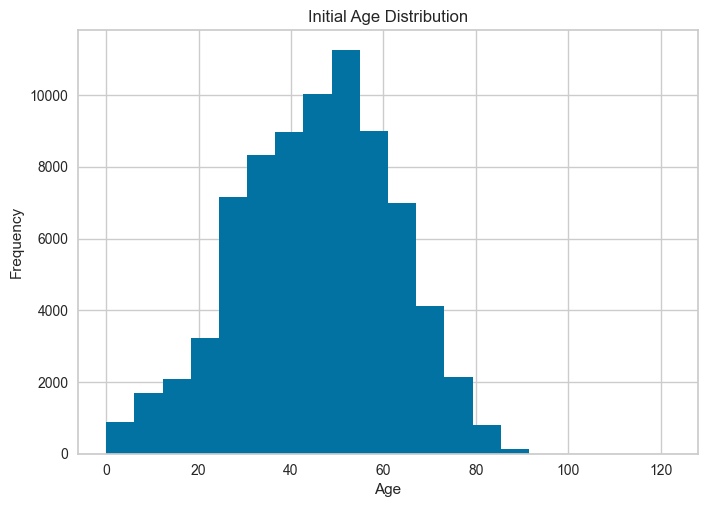


Imputing Ages:
Cross-validation scores (MSE): [305.50840887 271.09155816 273.04582365 314.55659243 306.87991603]
Mean Cross-validation score (MSE): 294.21645982905534

New Analysis:
New Age Variable Analysis after Imputation:
Mean Age: 45.33879100433881
Age Distribution:


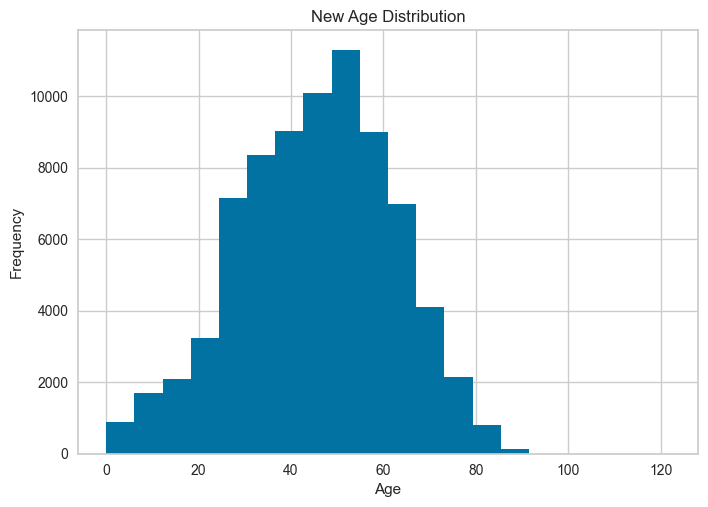

In [52]:
# Impute missing Random Forest in the 'Age'
# We find this a solid approach because this type of model can handle complex relationships between features and provide robust predictions 

# Function to perform initial age analysis
def initial_age_analysis(X2):
    print("Initial Age Variable Analysis:")
    mean_age = X2['Age'].mean()
    print("Mean Age:", mean_age)
    print("Age Distribution:")
    X2['Age'].hist(bins=20)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Initial Age Distribution')
    plt.show()

# Function to impute missing ages using RandomForest
def impute_ages_rf(X2):
    # Define the columns to be used as features for prediction
    feature_columns = ['MarketSegment', 'Nationality', 'BookingsCheckedIn', 'BookingsCanceled', 'LodgingRevenue']
    
    # Convert categorical columns to dummy variables
    X2_dummies = pd.get_dummies(X2[feature_columns], drop_first=True)
    
    # Separate rows with and without missing Age values
    X_train = X2_dummies[X2['Age'].notna()]
    y_train = X2['Age'][X2['Age'].notna()]
    X_predict = X2_dummies[X2['Age'].isna()]
    
    if X_train.shape[0] > 0:
        # Standardize numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_predict_scaled = scaler.transform(X_predict)
    else:
        # Handle case when there are no samples for training
        print("No samples available for training.")
        return X2
    
    # Train the RandomForest Model with cross-validation
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation scores (MSE):", -scores)
    print("Mean Cross-validation score (MSE):", -scores.mean())
    
    rf.fit(X_train_scaled, y_train)
    
    # Predict Missing Values
    predicted_ages = rf.predict(X_predict_scaled)
    
    # Combine the Data: Fill in the missing values with the predicted values
    X2.loc[X2['Age'].isna(), 'Age'] = predicted_ages
    
    return X2

# Function to perform new age analysis after imputation
def new_age_analysis(X2):
    print("New Age Variable Analysis after Imputation:")
    mean_age = X2['Age'].mean()
    print("Mean Age:", mean_age)
    print("Age Distribution:")
    X2['Age'].hist(bins=20)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('New Age Distribution')
    plt.show()

print("Initial Analysis:")
initial_age_analysis(X2)
print("\nImputing Ages:")
X2 = impute_ages_rf(X2)
print("\nNew Analysis:")
new_age_analysis(X2)

In [53]:
# Confirm the missing values are resolved
missing_values_age = X2['Age'].isnull().sum()
missing_values_age

0

In [54]:
# Check for any duplicated rows
duplicated_rows = X2.duplicated().sum()
print("Duplicated Rows:", duplicated_rows)

Duplicated Rows: 1623


### Handle Outliers

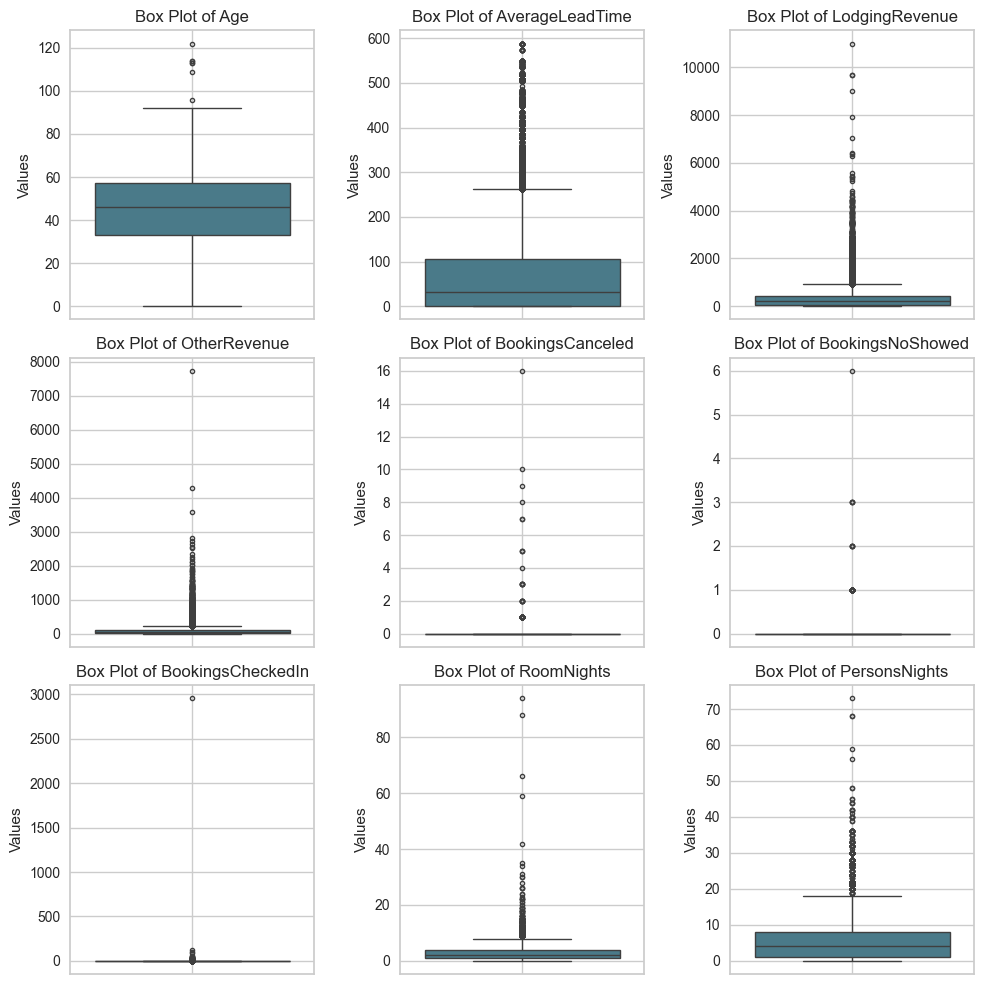

In [55]:
# Compute the Box Plot, once again, to analyze outliers

exclude_columns2 = ['ID', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'DaysSinceCreation', 'SRLowFloor', 'SRAccessibleRoom', 'SRHighFloor', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
numerical_columns2 = X2.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns2, errors='ignore')

num_cols = 3 
num_rows = (len(numerical_columns2.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
for i, col in enumerate(numerical_columns2.columns):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=X2[col], color=color1, fliersize=3)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel('Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

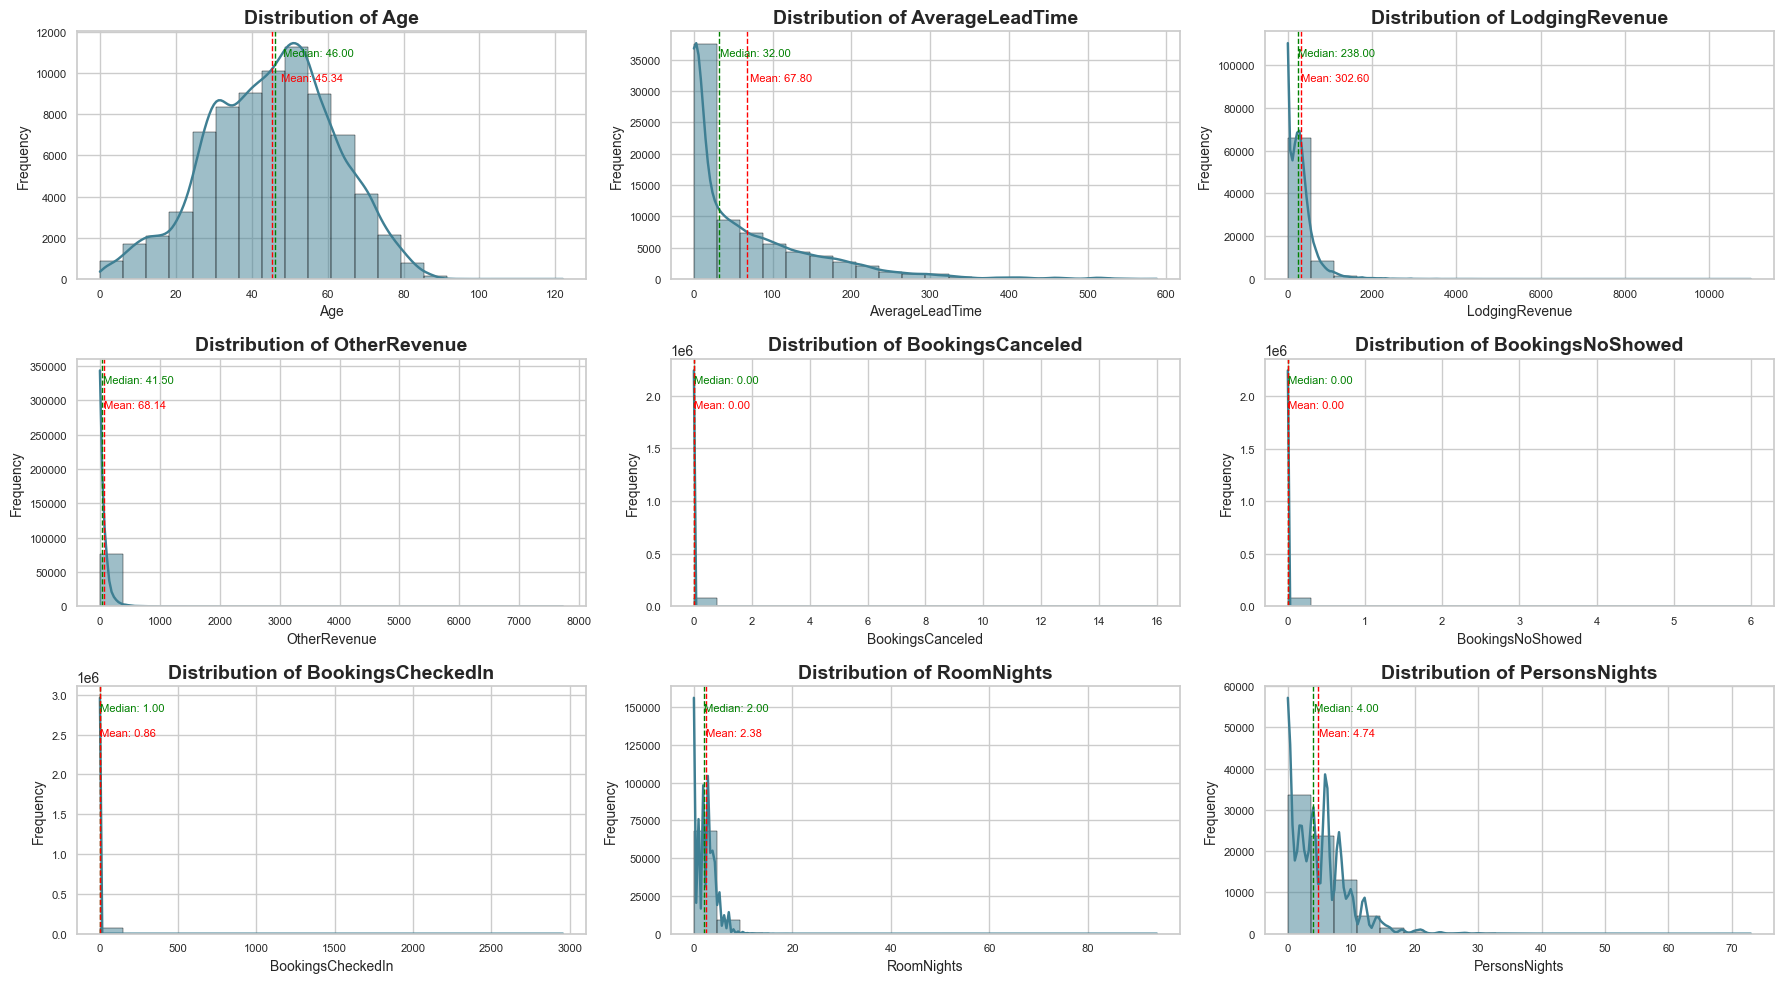

In [56]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_columns2.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(X2[col], bins=20, kde=True, color=color1, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(f'{col}', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add median and mean lines
    median_value = X2[col].median()
    mean_value = X2[col].mean()
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
    plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.tight_layout()
plt.show()

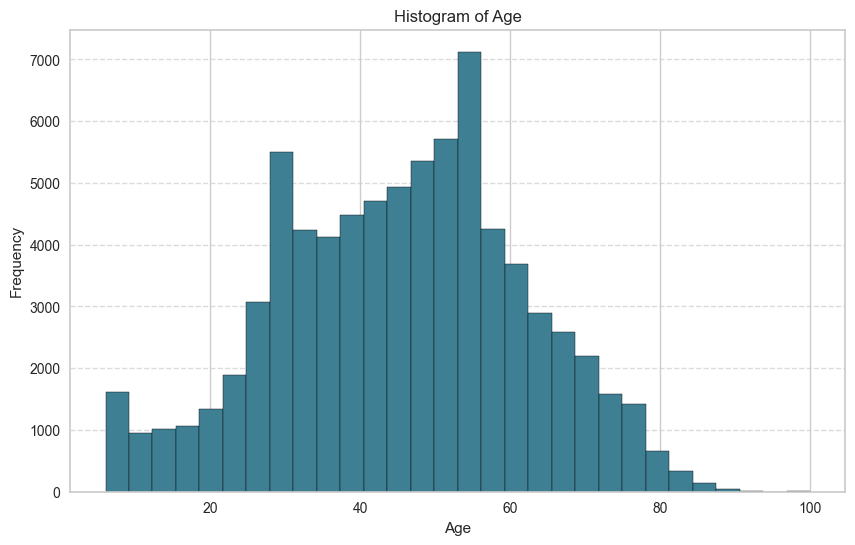

The maximum value of Age is: 100.0


In [57]:
# Handle missing values in 'Age'

# Capping is an effective technique for handling outliers, particularly in the `Age` column, by setting upper and/or lower bounds and replacing extreme values with these thresholds
# Unlike removing outliers, capping retains all data points, preserving data integrity while adjusting extreme values to fall within a reasonable range
# Moreover, it helps maintain the overall distribution shape, ensuring the data remains representative

# Define the function to cap outliers
def cap_outliers(X2, column, lower_bound=None, upper_bound=None):
    if lower_bound is None:
        lower_bound = X2[column].quantile(0.01)  # 1st percentile
    if upper_bound is None:
        upper_bound = X2[column].quantile(0.99)  # 99th percentile
    X2[column] = np.where(X2[column] < lower_bound, lower_bound, X2[column])
    X2[column] = np.where(X2[column] > upper_bound, upper_bound, X2[column])
    return X2

# Specific capping for 'Age'
X2 = cap_outliers(X2, 'Age', upper_bound=100)

# Visualize 'Age' after capping the outliers
plt.figure(figsize=(10, 6))
plt.hist(X2['Age'], bins=30, edgecolor='black', color=color1)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Print the maximum value of the 'Age' variable
max_age = X2['Age'].max()
print("The maximum value of Age is:", max_age)

In [58]:
# Handle missing values in 'AverageLeadTime' and 'BookingsCheckedIn'

# By capping outliers using the IQR method, the code ensures that the data is more representative of typical values, reducing the influence of extreme outliers and improving the overall quality and reliability of subsequent analyses.

def handle_outliers_iqr(X2, column):
    Q1 = X2[column].quantile(0.25)
    Q3 = X2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X2[column] = np.where(X2[column] < lower_bound, lower_bound, X2[column])
    X2[column] = np.where(X2[column] > upper_bound, upper_bound, X2[column])
    return X2

# Columns to handle with IQR method
iqr_columns = ['AverageLeadTime', 'BookingsCheckedIn']

for column in iqr_columns:
    X2 = handle_outliers_iqr(X2, column)
    
#Validate that the maximums are more regular values
max_avgt = X2['AverageLeadTime'].max()
print("The maximum value of AverageLeadTime is:", max_avgt)

max_checkin = X2['BookingsCheckedIn'].max()
print("The maximum value of BookingsCheckedIn is:", max_checkin)

The maximum value of AverageLeadTime is: 262.5
The maximum value of BookingsCheckedIn is: 1.0


In [59]:
# Handle missing values in 'LodgingRevenue' and 'OtherRevenue'

# Define the thresholds for capping
lodging_upper_threshold = X2['LodgingRevenue'].quantile(0.95)
other_upper_threshold = X2['OtherRevenue'].quantile(0.95)

# Cap the outliers
X2['Capped_LodgingRevenue'] = np.where(X2['LodgingRevenue'] > lodging_upper_threshold, lodging_upper_threshold, X2['LodgingRevenue'])
X2['Capped_OtherRevenue'] = np.where(X2['OtherRevenue'] > other_upper_threshold, other_upper_threshold, X2['OtherRevenue'])

# Apply log transformation - to stabilize the variance and make the data more normally distributed
X2['Log_Capped_LodgingRevenue'] = np.log1p(X2['Capped_LodgingRevenue'])
X2['Log_Capped_OtherRevenue'] = np.log1p(X2['Capped_OtherRevenue'])

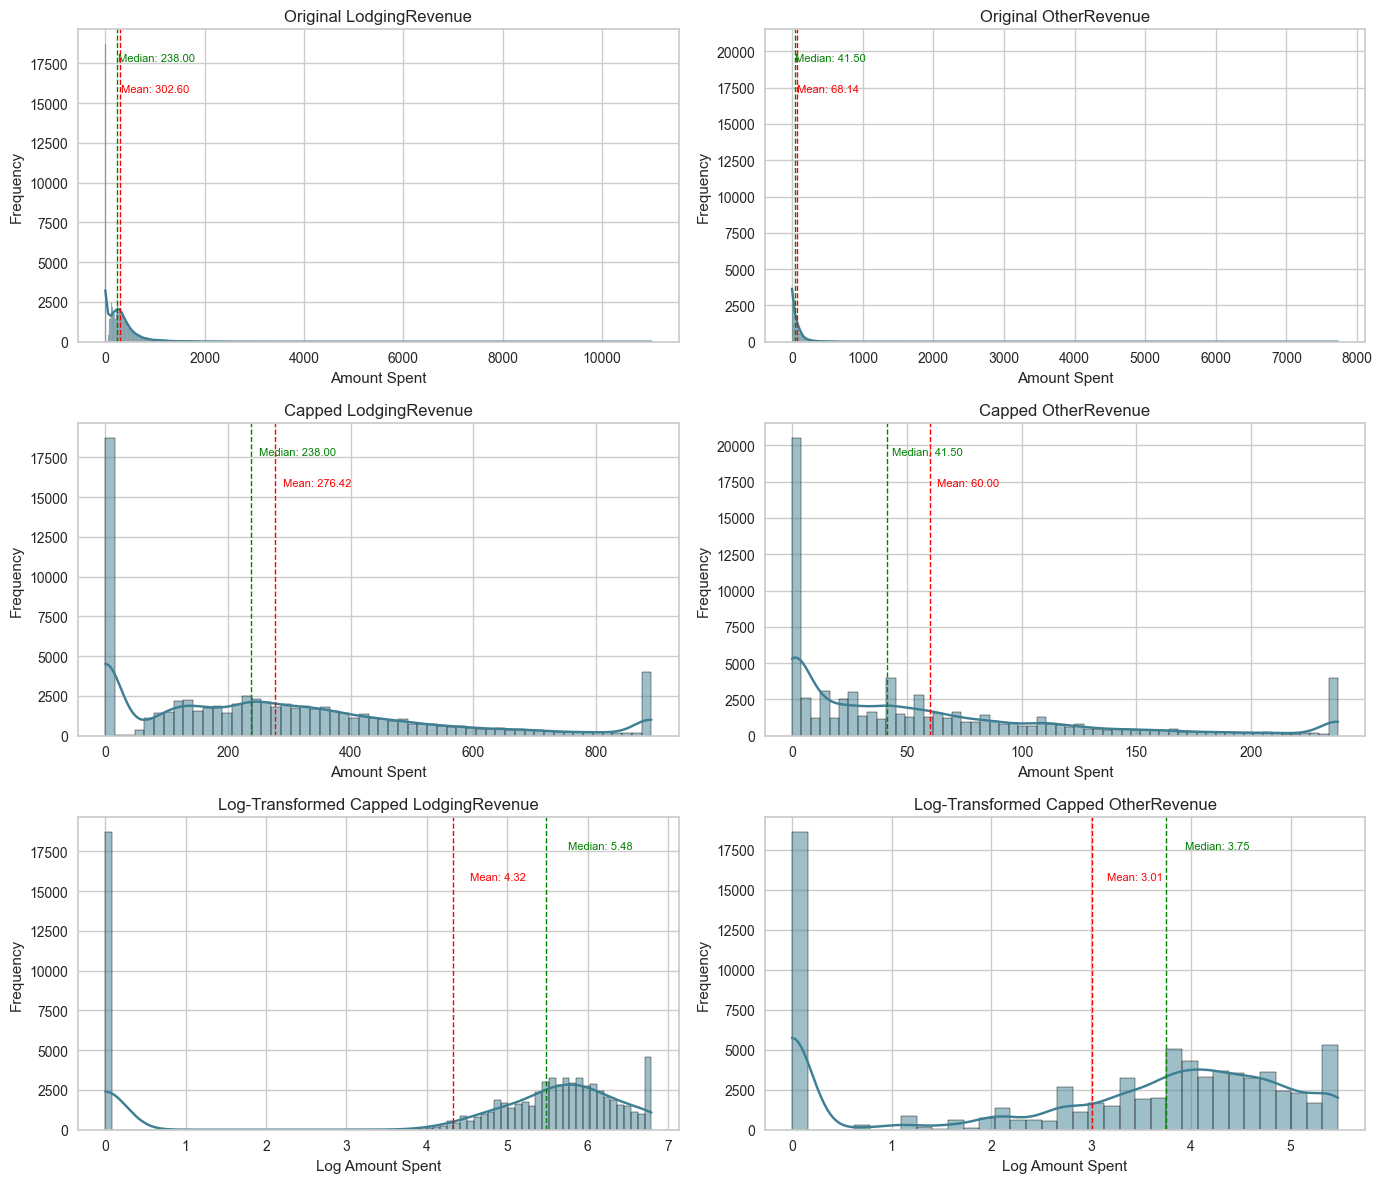

In [60]:
# Plot the original, capped, and log-transformed distributions
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
sns.histplot(X2['LodgingRevenue'], kde=True, color=color1)
plt.title('Original LodgingRevenue')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
median_value = X2['LodgingRevenue'].median()
mean_value = X2['LodgingRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.subplot(3, 2, 2)
sns.histplot(X2['OtherRevenue'], kde=True, color=color1)
plt.title('Original OtherRevenue')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
median_value = X2['OtherRevenue'].median()
mean_value = X2['OtherRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.subplot(3, 2, 3)
sns.histplot(X2['Capped_LodgingRevenue'], kde=True, color=color1)
plt.title('Capped LodgingRevenue')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
median_value = X2['Capped_LodgingRevenue'].median()
mean_value = X2['Capped_LodgingRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.subplot(3, 2, 4)
sns.histplot(X2['Capped_OtherRevenue'], kde=True, color=color1)
plt.title('Capped OtherRevenue')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
median_value = X2['Capped_OtherRevenue'].median()
mean_value = X2['Capped_OtherRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.subplot(3, 2, 5)
sns.histplot(X2['Log_Capped_LodgingRevenue'], kde=True, color=color1)
plt.title('Log-Transformed Capped LodgingRevenue')
plt.xlabel('Log Amount Spent')
plt.ylabel('Frequency')
median_value = X2['Log_Capped_LodgingRevenue'].median()
mean_value = X2['Log_Capped_LodgingRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.subplot(3, 2, 6)
sns.histplot(X2['Log_Capped_OtherRevenue'], kde=True, color=color1)
plt.title('Log-Transformed Capped OtherRevenue')
plt.xlabel('Log Amount Spent')
plt.ylabel('Frequency')
median_value = X2['Log_Capped_OtherRevenue'].median()
mean_value = X2['Log_Capped_OtherRevenue'].mean()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(median_value + 0.05 * median_value, plt.ylim()[1] * 0.9, f'Median: {median_value:.2f}', color='green', fontsize=8)
plt.text(mean_value + 0.05 * mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='red', fontsize=8)

plt.tight_layout()
plt.show()

#### Conclusion
We decided to keep both the capping and log transformation, so that the cluster analysis can be evaluated in terms of the influence of outliers and normalizing the data distribution. 
<br>

In [61]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76993 entries, 1 to 83590
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nationality                76993 non-null  object 
 1   Age                        76993 non-null  float64
 2   SRHighFloor                76993 non-null  int64  
 3   SRLowFloor                 76993 non-null  int64  
 4   SRAccessibleRoom           76993 non-null  int64  
 5   SRMediumFloor              76993 non-null  int64  
 6   SRBathtub                  76993 non-null  int64  
 7   SRShower                   76993 non-null  int64  
 8   SRCrib                     76993 non-null  int64  
 9   SRKingSizeBed              76993 non-null  int64  
 10  SRTwinBed                  76993 non-null  int64  
 11  SRNearElevator             76993 non-null  int64  
 12  SRAwayFromElevator         76993 non-null  int64  
 13  SRNoAlcoholInMiniBar       76993 non-null  int64  


In [62]:
# Remove irrelevant columns
X2 = X2.drop(columns=['LodgingRevenue', 'OtherRevenue'])

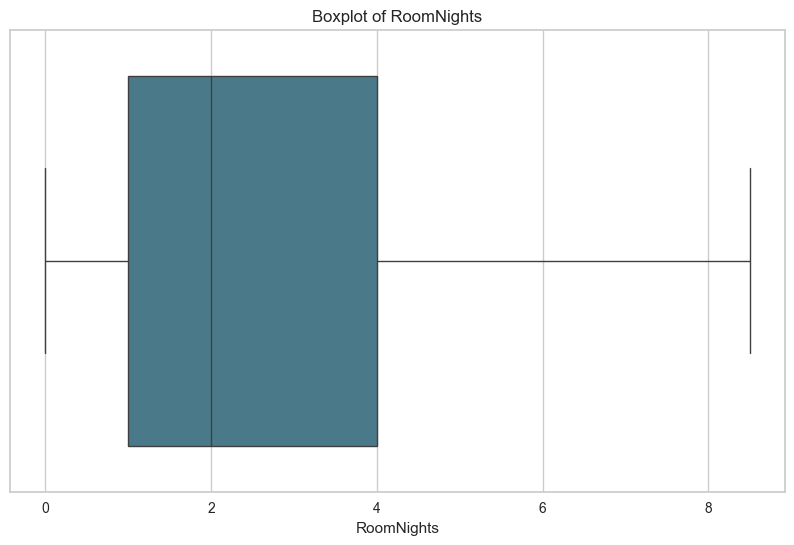

In [63]:
# Handle missing values in 'RoomNights'

Q1 = X2['RoomNights'].quantile(0.25)
Q3 = X2['RoomNights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X2['RoomNights'] = X2['RoomNights'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

plt.figure(figsize=(10, 6))
sns.boxplot(x=X2['RoomNights'], color=color1)
plt.title('Boxplot of RoomNights')
plt.xlabel('RoomNights')
plt.show()

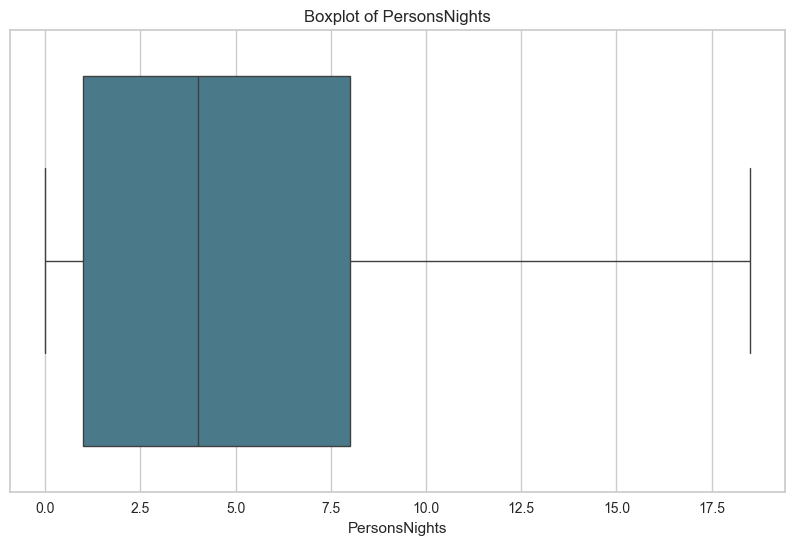

In [64]:
# Handle missing values in 'PersonsNights'

Q1 = X2['PersonsNights'].quantile(0.25)
Q3 = X2['PersonsNights'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X2['PersonsNights'] = X2['PersonsNights'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

plt.figure(figsize=(10, 6))
sns.boxplot(x=X2['PersonsNights'], color=color1)
plt.title('Boxplot of PersonsNights')
plt.xlabel('PersonsNights')
plt.show()

In [65]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76993 entries, 1 to 83590
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nationality                76993 non-null  object 
 1   Age                        76993 non-null  float64
 2   SRHighFloor                76993 non-null  int64  
 3   SRLowFloor                 76993 non-null  int64  
 4   SRAccessibleRoom           76993 non-null  int64  
 5   SRMediumFloor              76993 non-null  int64  
 6   SRBathtub                  76993 non-null  int64  
 7   SRShower                   76993 non-null  int64  
 8   SRCrib                     76993 non-null  int64  
 9   SRKingSizeBed              76993 non-null  int64  
 10  SRTwinBed                  76993 non-null  int64  
 11  SRNearElevator             76993 non-null  int64  
 12  SRAwayFromElevator         76993 non-null  int64  
 13  SRNoAlcoholInMiniBar       76993 non-null  int64  


In [66]:
# Check once again for any duplicated rows
duplicated_rows = X2.duplicated().sum()
print("Duplicated Rows:", duplicated_rows)

Duplicated Rows: 1727


In [67]:
# Check for duplicated rows in the dataset
duplicates = X2[X2.duplicated(keep=False)]  # keep=False marks all duplicates as True

# Group the duplicated rows by all columns and count occurrences
grouped_duplicates = duplicates.groupby(list(duplicates.columns)).size().reset_index(name='Count')

# Display the aggregated duplicated rows
print(f"Number of duplicated rows: {len(duplicates)}")
print(grouped_duplicates)

Number of duplicated rows: 3121
     Nationality   Age  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0            AGO   6.0            0           0                 0   
1            ARG  44.0            0           0                 0   
2            AUS  20.0            0           0                 0   
3            AUS  54.0            0           0                 0   
4            AUS  61.0            0           0                 0   
...          ...   ...          ...         ...               ...   
1389         USA  76.0            0           0                 0   
1390         USA  77.0            0           0                 0   
1391         VNM  37.0            0           0                 0   
1392         VNM  48.0            0           0                 0   
1393         VNM  52.0            0           0                 0   

      SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  ...  \
0                 0          0         0       0              0  ..

In [68]:
count_distribution = grouped_duplicates['Count'].value_counts()
print(count_distribution)

Count
2    1163
3     164
4      47
5      11
6       5
8       2
7       2
Name: count, dtype: int64


#### Conclusion
We have previously ensured that there are no duplicate IDs, which guarantees that each row represents a unique customer. Finding duplicate rows in our dataset indicate that there are customers (no more than 7) who have the same attributes (e.g., age, nationality) and have identical behaviors and choices. This does not necessarily mean an error in the data, but rather it suggests that some customers share similar profiles.
In the context of clustering, this information can be valuable as it highlights groups of customers with highly similar characteristics and preferences, which might be expected in certain segments. Thus, these duplicates should be considered as natural occurrences within the dataset and not removed.

### Feature Engineering

In [69]:
# Create a variable for no status reservations
X2['NoStatusReservation'] = (
    (X2['BookingsCheckedIn'] == 0) &
    (X2['BookingsCanceled'] == 0) &
    (X2['BookingsNoShowed'] == 0) &
    (X2['AverageLeadTime'] != 0)
).astype(int)

In [70]:
# Count the values of the NoStatusReservation variable
no_status_counts = X2['NoStatusReservation'].value_counts()

print("Count of NoStatusReservation values:")
print(no_status_counts)

Count of NoStatusReservation values:
NoStatusReservation
0    76993
Name: count, dtype: int64


In [71]:
X2.drop(columns=['NoStatusReservation'], inplace=True)

#### Feature Creation - Revenue Related Features

In [72]:
# Create several new features based on existing ones to enrich our dataset for analysis

#Total Revenue: Life Time Value of a customer /total revenue genereated since it combining both lodging revenue and other types of revenue 
X2['TotalRevenue'] = X2['Capped_LodgingRevenue'] + X2['Capped_OtherRevenue']

#RevenuePerNight: Amount of revenue generated per room night (night of stay)
X2['RevenuePerNight'] = X2['TotalRevenue'] / (X2['RoomNights']+1) # Adding 1 to avoid division by zero

#RevenuePerPerson: Amount of revenue generated per individual stay
X2['RevenuePerPerson'] = X2['TotalRevenue'] / (X2['PersonsNights']+1) # Adding 1 to avoid division by zero

#AvgRevenuePerStay: Average revenue per stay calculated as total lodging revenue divided by the number of bookings checked in
X2['AvgRevenuePerStay'] = X2['TotalRevenue'] / (X2['BookingsCheckedIn']+1) # Adding 1 to avoid division by zero

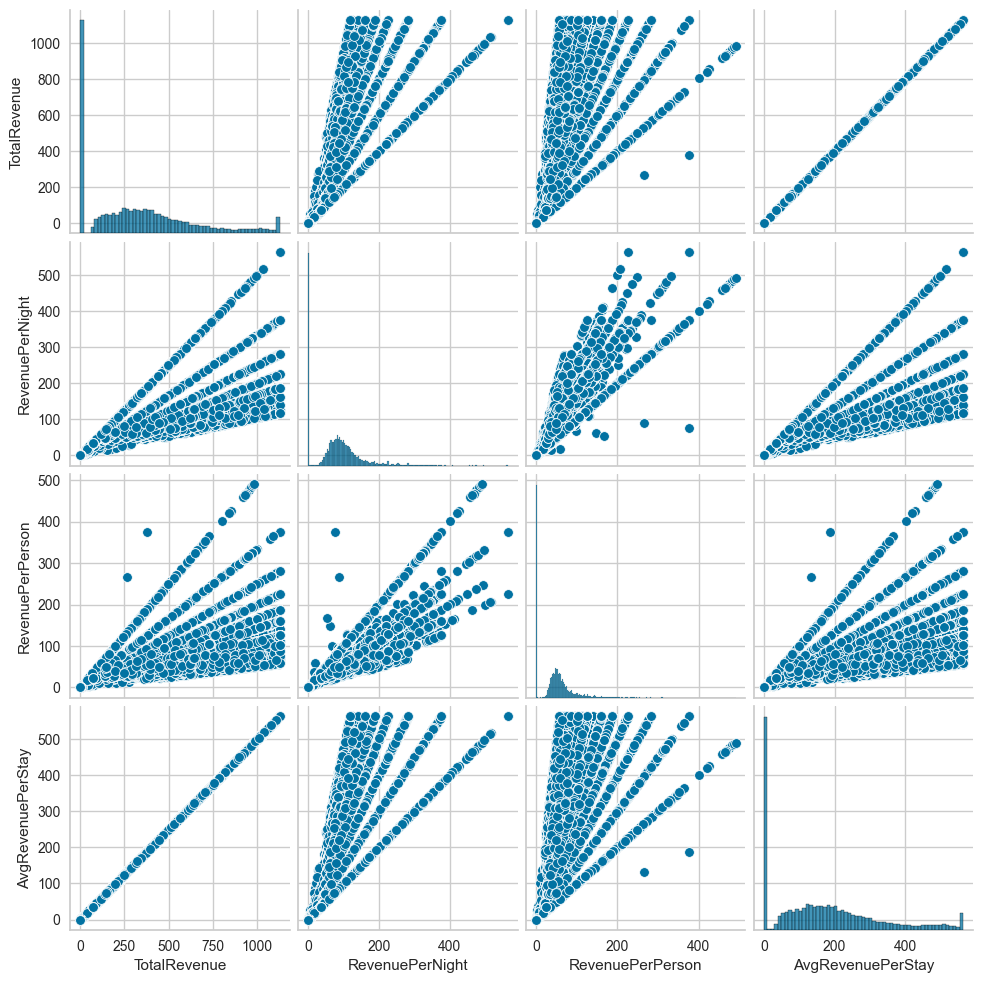

In [73]:
# Pair Plot
sns.pairplot(X2[['TotalRevenue', 'RevenuePerNight', 'RevenuePerPerson', 'AvgRevenuePerStay']])
plt.show()

In [74]:
# Confirm that there are no missing values
percent_missing = (X2.isnull().mean() * 100).round(2)
print(percent_missing[percent_missing > 0])

Series([], dtype: float64)


In [75]:
# Variables to check for zero values
vars_to_check = ['TotalRevenue', 'RevenuePerNight', 'RevenuePerPerson', 'AvgRevenuePerStay']

# Count the number of times each variable is zero
zero_counts = (X2[vars_to_check] == 0).sum()

# Display the counts
print("Number of times each variable is zero:")
print(zero_counts)

Number of times each variable is zero:
TotalRevenue         18573
RevenuePerNight      18573
RevenuePerPerson     18573
AvgRevenuePerStay    18573
dtype: int64


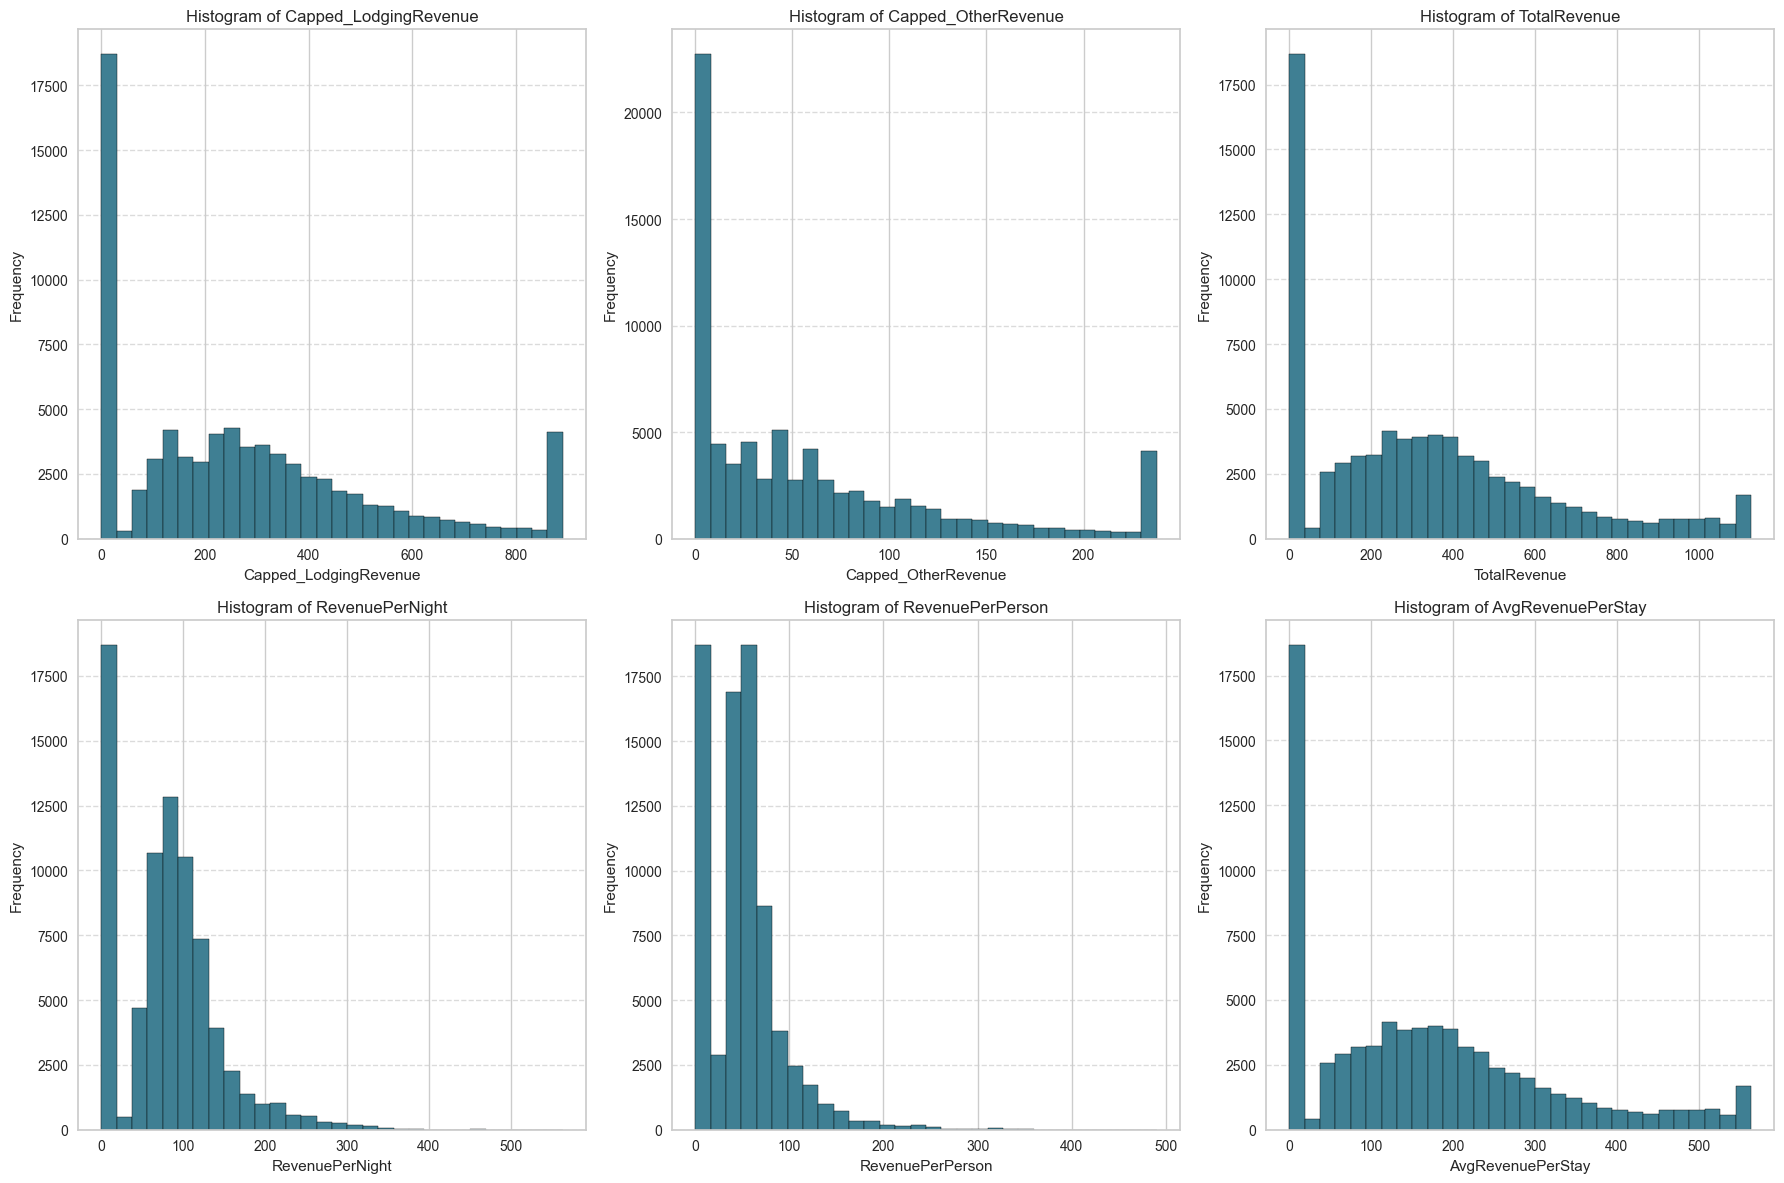

In [76]:
# List of revenue-related features
revenue_features = ['Capped_LodgingRevenue', 'Capped_OtherRevenue', 'TotalRevenue', 'RevenuePerNight', 'RevenuePerPerson', 'AvgRevenuePerStay']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten() 

for ax, feature in zip(axes, revenue_features):
    ax.hist(X2[feature].dropna(), bins=30, color=color1, edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

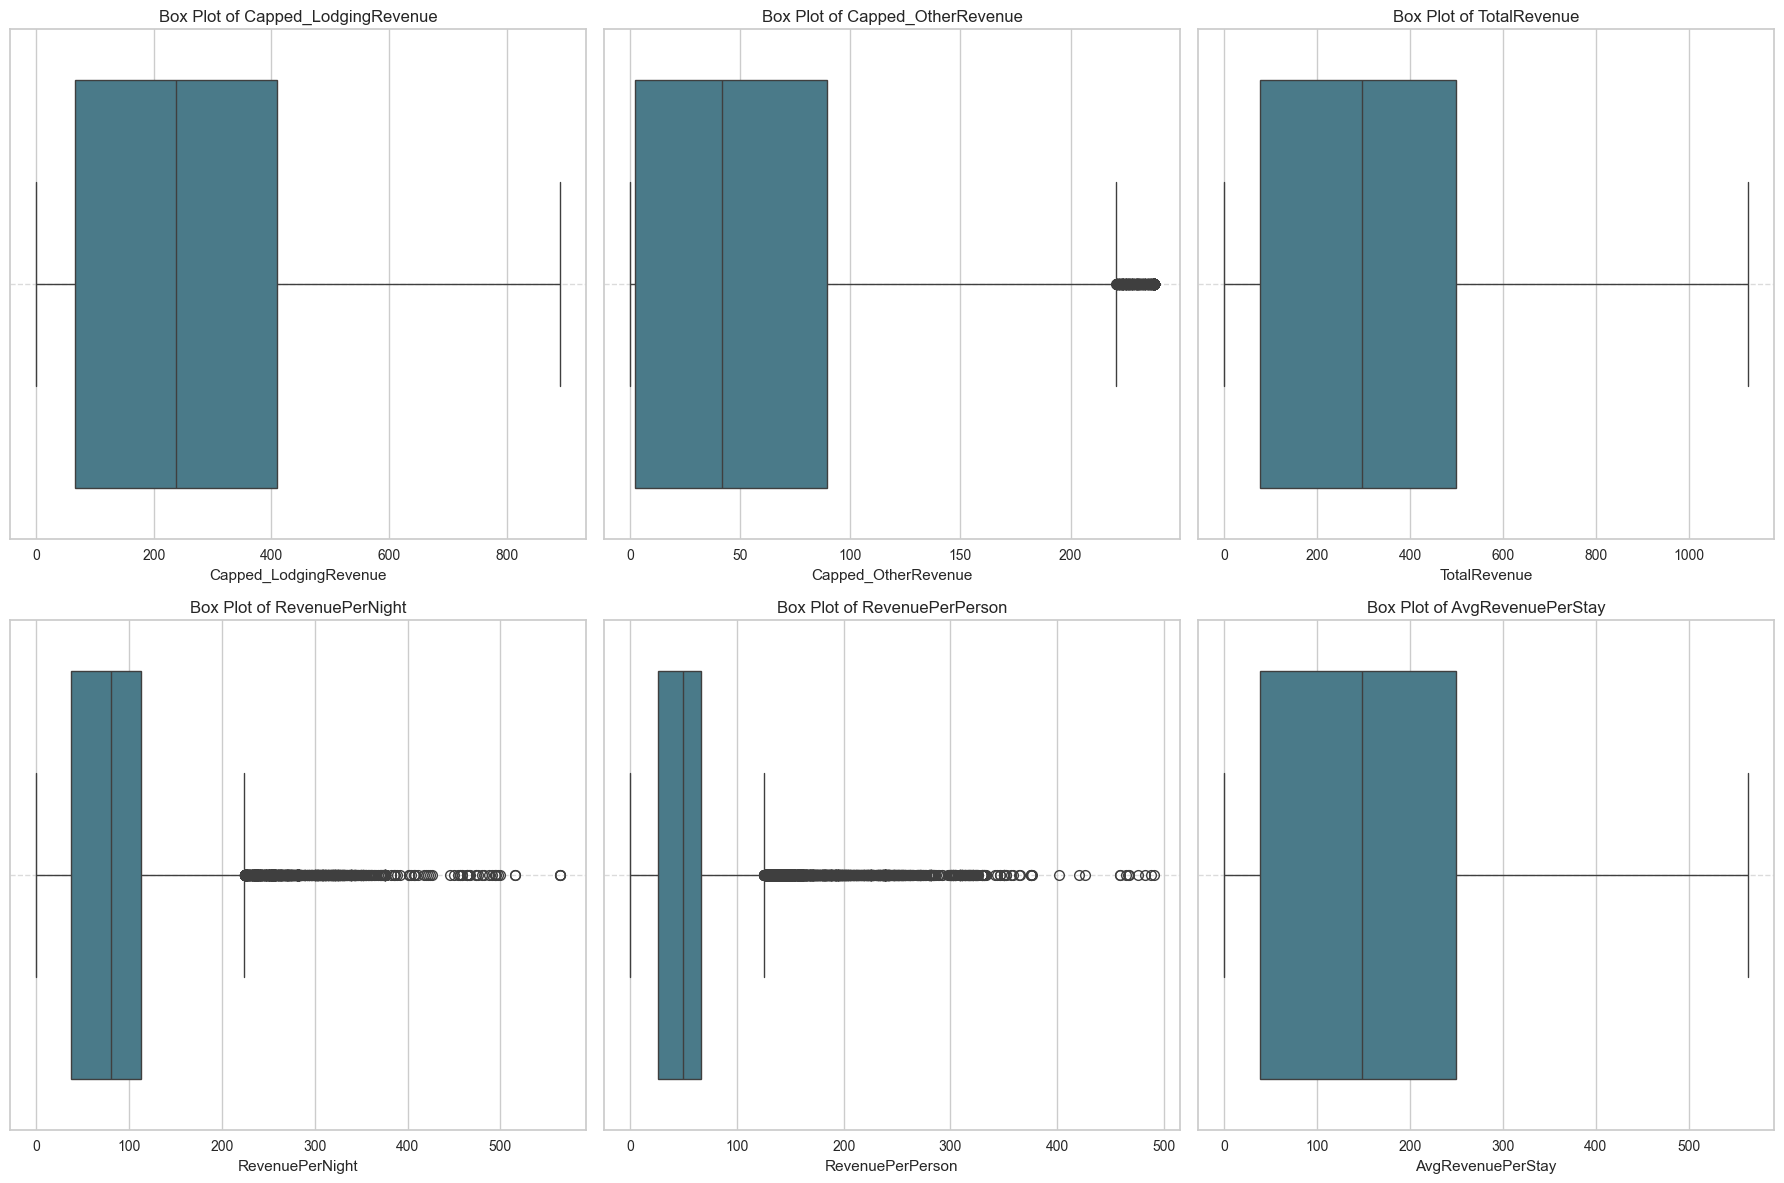

In [77]:
# Plot box plots for each revenue feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for ax, feature in zip(axes, revenue_features):
    sns.boxplot(x=X2[feature].dropna(), color=color1, ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

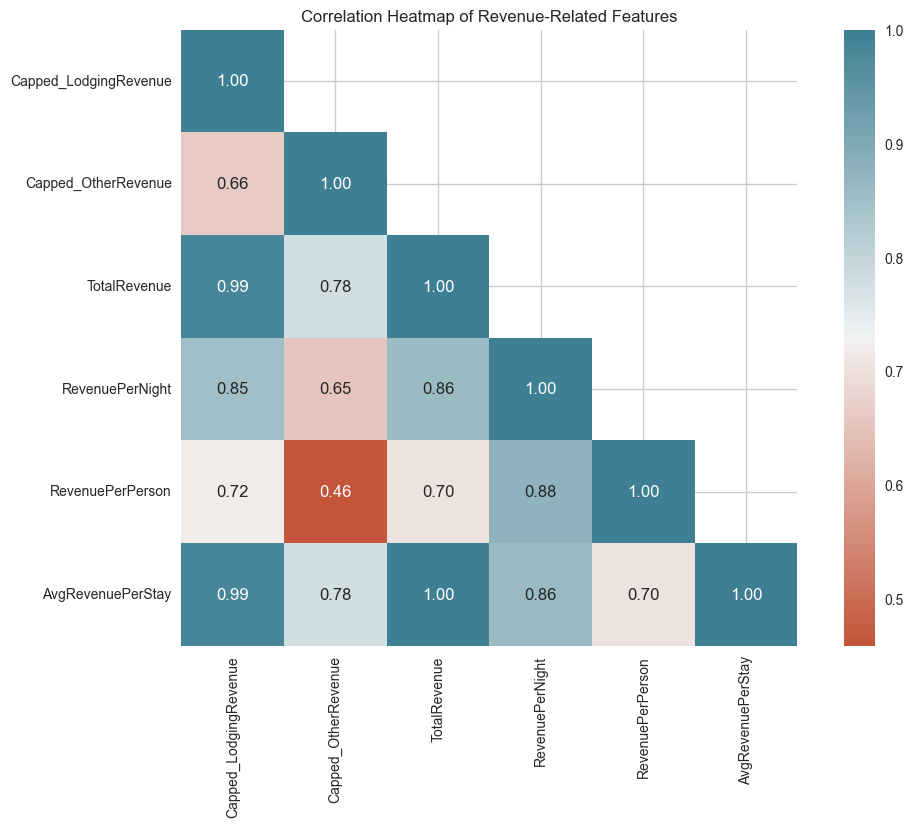

In [78]:
# Visualize the correlation matrix for revenue features
corr_matrix = X2[revenue_features].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Revenue-Related Features')
plt.show()

#### Feature Creation - Spending Patterns

In [79]:
# Understand the behaviour of 'TotalRevenue'

min_revenue = X2['TotalRevenue'].min()
max_revenue = X2['TotalRevenue'].max()
num_bins = 5
bins = pd.cut(X2['TotalRevenue'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()
print("Intervals of TotalRevenue:")
print(bin_counts)

Intervals of TotalRevenue:
TotalRevenue
(-1.128, 225.556]     30987
(225.556, 451.112]    23021
(451.112, 676.668]    12511
(676.668, 902.224]     5116
(902.224, 1127.78]     5358
Name: count, dtype: int64


In [80]:
# HighSpender: Indicator for high spenders based on the previous analysis
# Based on the previous analysis, a threshold around 676.668 captures customers in the top three intervals, approximately 13% of the total

high_spender_threshold = 676.668  # Threshold based on interval analysis
X2['HighSpender'] = (X2['TotalRevenue'] > high_spender_threshold).astype(int)

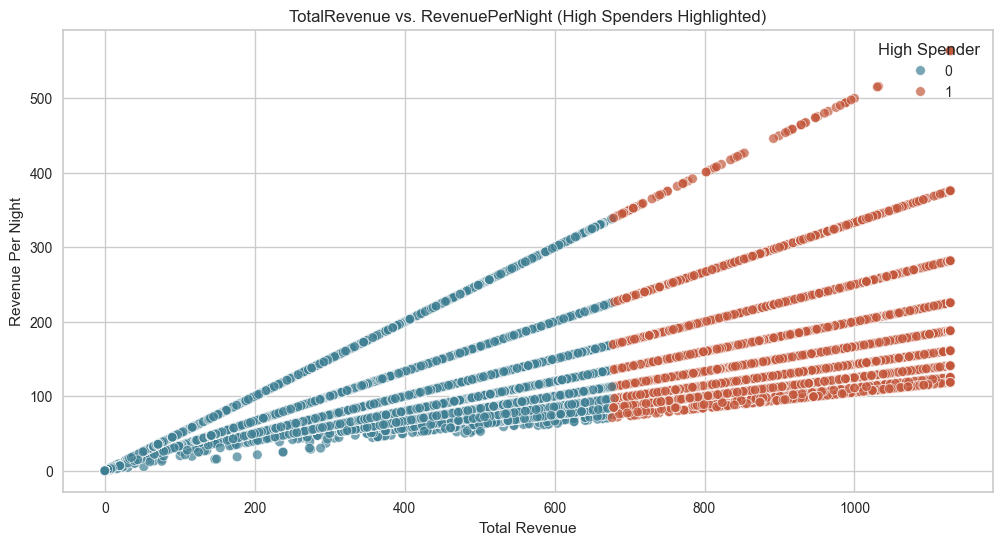

In [93]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='TotalRevenue',
    y='RevenuePerNight',
    hue='HighSpender',
    data=X2,
    palette={0: color1, 1: color5},
    alpha=0.7
)
plt.title('TotalRevenue vs. RevenuePerNight (High Spenders Highlighted)')
plt.xlabel('Total Revenue')
plt.ylabel('Revenue Per Night')
plt.legend(title='High Spender', loc='upper right')
plt.show()

In [82]:
# LodgingVsOtherRatio: Ratio of lodging revenue to other revenue
X2['LodgingVsOtherRatio'] = X2['Log_Capped_LodgingRevenue'] / (X2['Log_Capped_OtherRevenue'] + 1)  # Adding 1 to avoid division by zero

In [83]:
#AvgRevenuePerSegment: Average total revenue per market segment
market_segment_revenue = X2.groupby('MarketSegment')['TotalRevenue'].mean().reset_index()
market_segment_revenue.columns = ['MarketSegment', 'AvgRevenuePerSegment']
X2 = X2.merge(market_segment_revenue, on='MarketSegment', how='left')

In [84]:
# Display the first few rows to check the new features
print(X2.head())

  Nationality   Age  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
0         PRT  51.0            0           0                 0              0   
1         PRT  39.0            0           0                 0              0   
2         DEU  31.0            0           0                 0              0   
3         FRA  60.0            0           0                 0              0   
4         FRA  51.0            0           0                 0              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  ...  Capped_OtherRevenue  \
0          0         0       0              0  ...           105.300000   
1          0         0       0              0  ...            60.086035   
2          0         0       0              0  ...             0.000000   
3          0         0       0              0  ...            60.000000   
4          0         0       0              0  ...             0.000000   

   Log_Capped_LodgingRevenue  Log_Capped_OtherRevenue  TotalRe

#### Feature Creation - Customer Preference Features

In [85]:
# TotalSpecialRequests: Total count of all special requests
special_request_columns = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
X2['TotalSpecialRequests'] = X2[special_request_columns].sum(axis=1)

# SpecialRequestDiversity: Number of unique special requests
X2['SpecialRequestDiversity'] = X2[special_request_columns].apply(lambda x: (x > 0).sum(), axis=1)

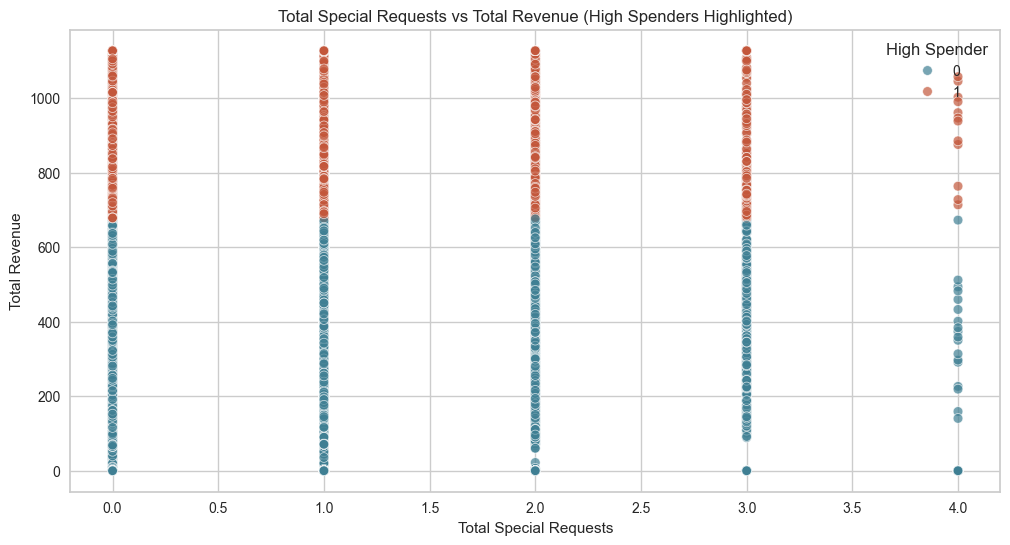

In [94]:
# Scatter Plot for TotalSpecialRequests vs TotalRevenue
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='TotalSpecialRequests',
    y='TotalRevenue',
    hue='HighSpender',
    data=X2,
    palette={0: color1, 1: color5},
    alpha=0.7
)
plt.title('Total Special Requests vs Total Revenue (High Spenders Highlighted)')
plt.xlabel('Total Special Requests')
plt.ylabel('Total Revenue')
plt.legend(title='High Spender', loc='upper right')
plt.show()

#### Feature Creation - Booking Behaviour Features

In [87]:
# CancellationRate: Ratio of bookings canceled to total bookings
X2['CancellationRate'] = X2['BookingsCanceled'] / (X2['BookingsCanceled'] + X2['BookingsCheckedIn'] + X2['BookingsNoShowed'])

# NoShowRate: Ratio of bookings no-showed to total bookings
X2['NoShowRate'] = X2['BookingsNoShowed'] / (X2['BookingsCanceled'] + X2['BookingsCheckedIn'] + X2['BookingsNoShowed'])

#### Feature Creation - Derived Time Features

In [89]:
# CustomerLoyalty: Ratio of days since the first stay to the number of bookings checked in
X2['CustomerLoyalty'] = X2['DaysSinceFirstStay'] / (X2['BookingsCheckedIn']+1) # Adding 1 to avoid division by zero

# RecentActivity: Ratio of days since the last stay to the number of bookings checked in
X2['RecentActivity'] = X2['DaysSinceLastStay'] / (X2['BookingsCheckedIn']+1) # Adding 1 to avoid division by zero

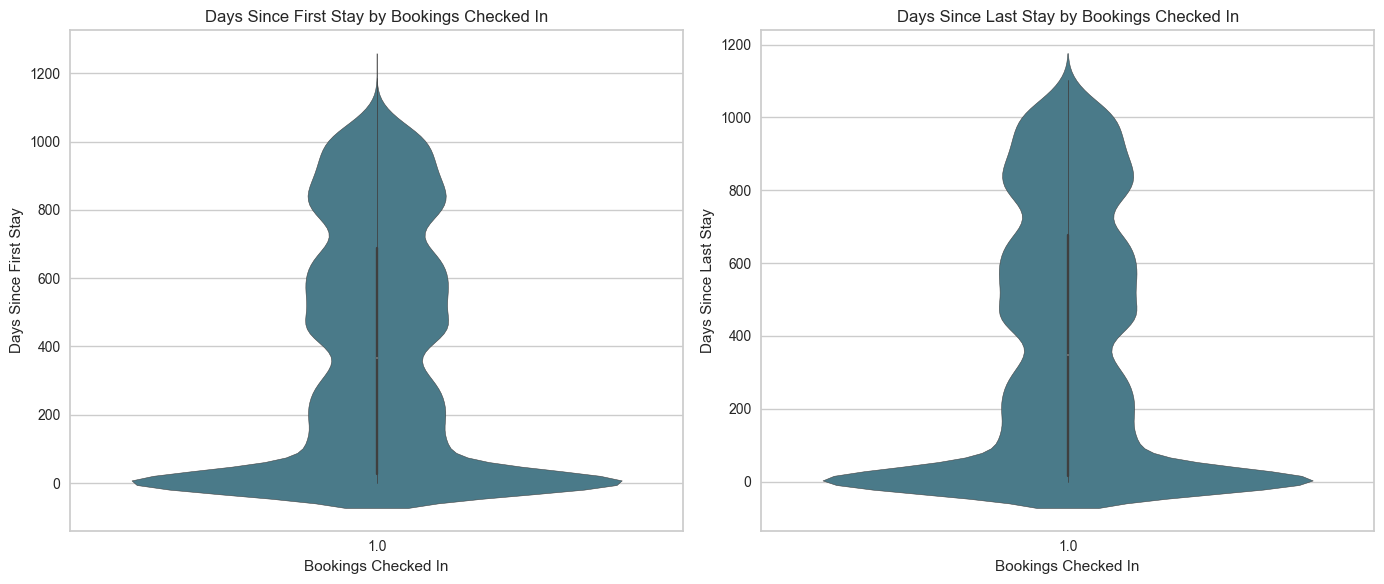

In [101]:
# Violin plot to understand the distribution of DaysSinceFirstStay and DaysSinceLastStay for different levels of BookingsCheckedIn

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='BookingsCheckedIn', y='DaysSinceFirstStay', data=X2, color=color1)
plt.title('Days Since First Stay by Bookings Checked In')
plt.xlabel('Bookings Checked In')
plt.ylabel('Days Since First Stay')

plt.subplot(1, 2, 2)
sns.violinplot(x='BookingsCheckedIn', y='DaysSinceLastStay', data=X2, color=color1)
plt.title('Days Since Last Stay by Bookings Checked In')
plt.xlabel('Bookings Checked In')
plt.ylabel('Days Since Last Stay')

plt.tight_layout()
plt.show()

#### Feature Creation - Duration Related Features

In [90]:
# StaysPerYear: Regularity of a customer's visits
X2['YearsAsCustomer'] = X2['DaysSinceCreation'] / 365 #check number of years as a customer
X2['StaysPerYear'] = X2['BookingsCheckedIn'] / (X2['YearsAsCustomer'] + 1) # Adding 1 to avoid division by zero

In [108]:
stays_per_year_counts = X2['StaysPerYear'].value_counts()

print("Value Counts of Stays Per Year:")
print(stays_per_year_counts)

Value Counts of Stays Per Year:
StaysPerYear
0.632582    264
0.611390    238
0.943152    222
0.783262    219
0.565015    219
           ... 
0.253121      4
0.252595      4
0.251377      4
0.435561      3
0.284268      1
Name: count, Length: 1095, dtype: int64


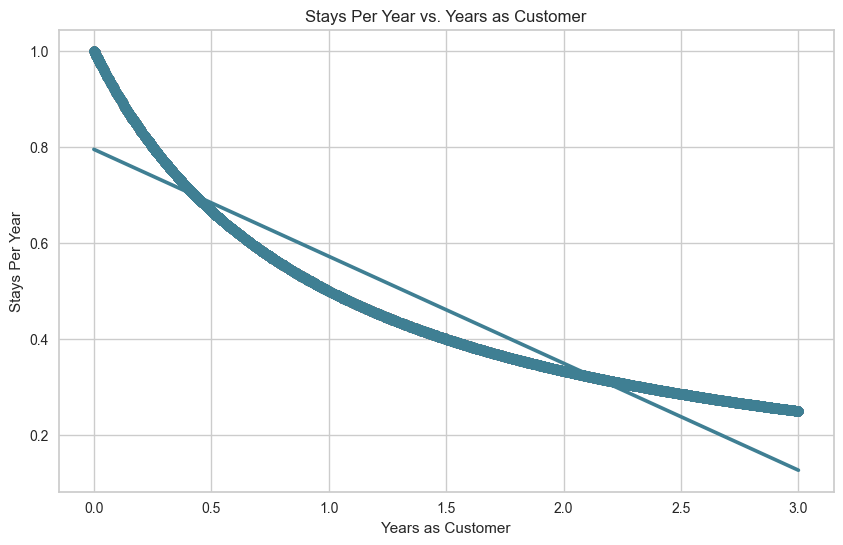

In [103]:
# Scatter Plot with regression line to visualize the relationship between YearsAsCustomer and StaysPerYear

plt.figure(figsize=(10, 6))
sns.regplot(x='YearsAsCustomer', y='StaysPerYear', data=X2, scatter_kws={'alpha':0.5}, color=color1)
plt.title('Stays Per Year vs. Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Stays Per Year')
plt.grid(True)
plt.show()

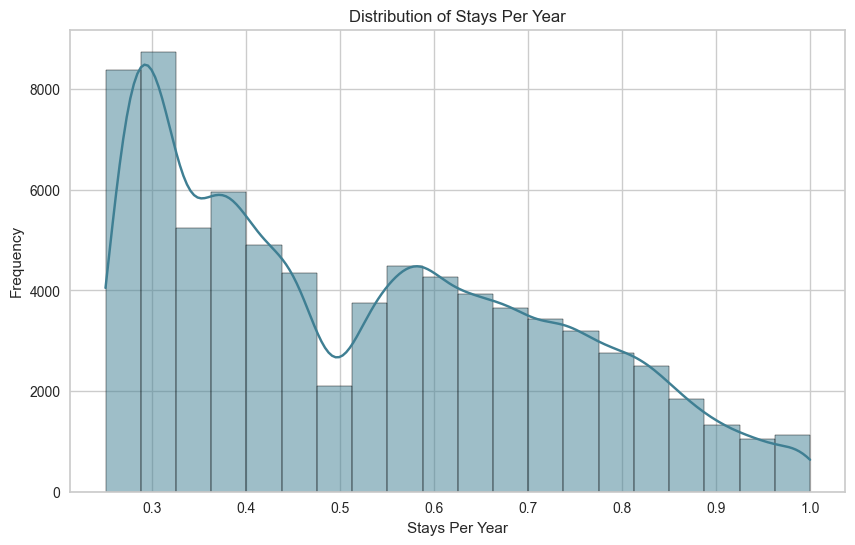

In [106]:
# Show the distribution of StaysPerYear by plotting a histogram

plt.figure(figsize=(10, 6))
sns.histplot(X2['StaysPerYear'], bins=20, kde=True, color=color1)
plt.title('Distribution of Stays Per Year')
plt.xlabel('Stays Per Year')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [109]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nationality                76993 non-null  object 
 1   Age                        76993 non-null  float64
 2   SRHighFloor                76993 non-null  int64  
 3   SRLowFloor                 76993 non-null  int64  
 4   SRAccessibleRoom           76993 non-null  int64  
 5   SRMediumFloor              76993 non-null  int64  
 6   SRBathtub                  76993 non-null  int64  
 7   SRShower                   76993 non-null  int64  
 8   SRCrib                     76993 non-null  int64  
 9   SRKingSizeBed              76993 non-null  int64  
 10  SRTwinBed                  76993 non-null  int64  
 11  SRNearElevator             76993 non-null  int64  
 12  SRAwayFromElevator         76993 non-null  int64  
 13  SRNoAlcoholInMiniBar       76993 non-null  int

In [110]:
# Summary statistics for numerical variables, to understand them and check for inconsistencies 
X2.describe(include=['number']).T

count        mean         std        min  \
Age                        76993.0   45.365819   16.539271   6.000000   
SRHighFloor                76993.0    0.048732    0.215308   0.000000   
SRLowFloor                 76993.0    0.001455    0.038113   0.000000   
SRAccessibleRoom           76993.0    0.000234    0.015288   0.000000   
SRMediumFloor              76993.0    0.000753    0.027436   0.000000   
SRBathtub                  76993.0    0.002935    0.054099   0.000000   
SRShower                   76993.0    0.001792    0.042299   0.000000   
SRCrib                     76993.0    0.013495    0.115381   0.000000   
SRKingSizeBed              76993.0    0.356565    0.478988   0.000000   
SRTwinBed                  76993.0    0.145455    0.352561   0.000000   
SRNearElevator             76993.0    0.000325    0.018017   0.000000   
SRAwayFromElevator         76993.0    0.003429    0.058457   0.000000   
SRNoAlcoholInMiniBar       76993.0    0.000130    0.011396   0.000000   
SRQuietRoom                76993.0    0.090761    0.287272   0.000000   
AverageLeadTime            76993.0   64.360405   76.725086   0.000000   
BookingsCanceled           76993.0    0.002195    0.103993   0.000000   
BookingsNoShowed           76993.0    0.000688    0.038976   0.000000   
BookingsCheckedIn          76993.0    1.000000    0.000000   1.000000   
RoomNights                 76993.0    2.359565    1.920987   0.000000   
PersonsNights              76993.0    4.676639    4.256937   0.000000   
DaysSinceLastStay          76993.0  393.582871  344.172551   0.000000   
DaysSinceFirstStay         76993.0  399.963945  345.243512   0.000000   
DaysSinceCreation          76993.0  445.550570  310.807315   0.000000   
Capped_LodgingRevenue      76993.0  276.416794  250.413196   0.000000   
Capped_OtherRevenue        76993.0   60.003510   67.194878   0.000000   
Log_Capped_LodgingRevenue  76993.0    4.321984    2.511716   0.000000   
Log_Capped_OtherRevenue    76993.0    3.007703    1.918423   0.000000   
TotalRevenue               76993.0  336.420305  299.021947   0.000000   
RevenuePerNight            76993.0   80.213634   63.156201   0.000000   
RevenuePerPerson           76993.0   49.949711   42.540248   0.000000   
AvgRevenuePerStay          76993.0  168.210152  149.510974   0.000000   
HighSpender                76993.0    0.136038    0.342832   0.000000   
LodgingVsOtherRatio        76993.0    0.907915    0.573932   0.000000   
AvgRevenuePerSegment       76993.0  336.420305   32.647233  48.221158   
TotalSpecialRequests       76993.0    0.666061    0.690331   0.000000   
SpecialRequestDiversity    76993.0    0.666061    0.690331   0.000000   
CancellationRate           76993.0    0.000585    0.018046   0.000000   
NoShowRate                 76993.0    0.000182    0.009055   0.000000   
CustomerLoyalty            76993.0  199.981972  172.621756   0.000000   
RecentActivity             76993.0  196.791436  172.086276   0.000000   
YearsAsCustomer            76993.0    1.220686    0.851527   0.000000   
StaysPerYear               76993.0    0.522999    0.200354   0.250000   

                                  25%         50%         75%          max  
Age                         33.000000   46.000000   57.000000   100.000000  
SRHighFloor                  0.000000    0.000000    0.000000     1.000000  
SRLowFloor                   0.000000    0.000000    0.000000     1.000000  
SRAccessibleRoom             0.000000    0.000000    0.000000     1.000000  
SRMediumFloor                0.000000    0.000000    0.000000     1.000000  
SRBathtub                    0.000000    0.000000    0.000000     1.000000  
SRShower                     0.000000    0.000000    0.000000     1.000000  
SRCrib                       0.000000    0.000000    0.000000     1.000000  
SRKingSizeBed                0.000000    0.000000    1.000000     1.000000  
SRTwinBed                    0.000000    0.000000    0.000000     1.000000  
SRNearElevator               0.000000    0

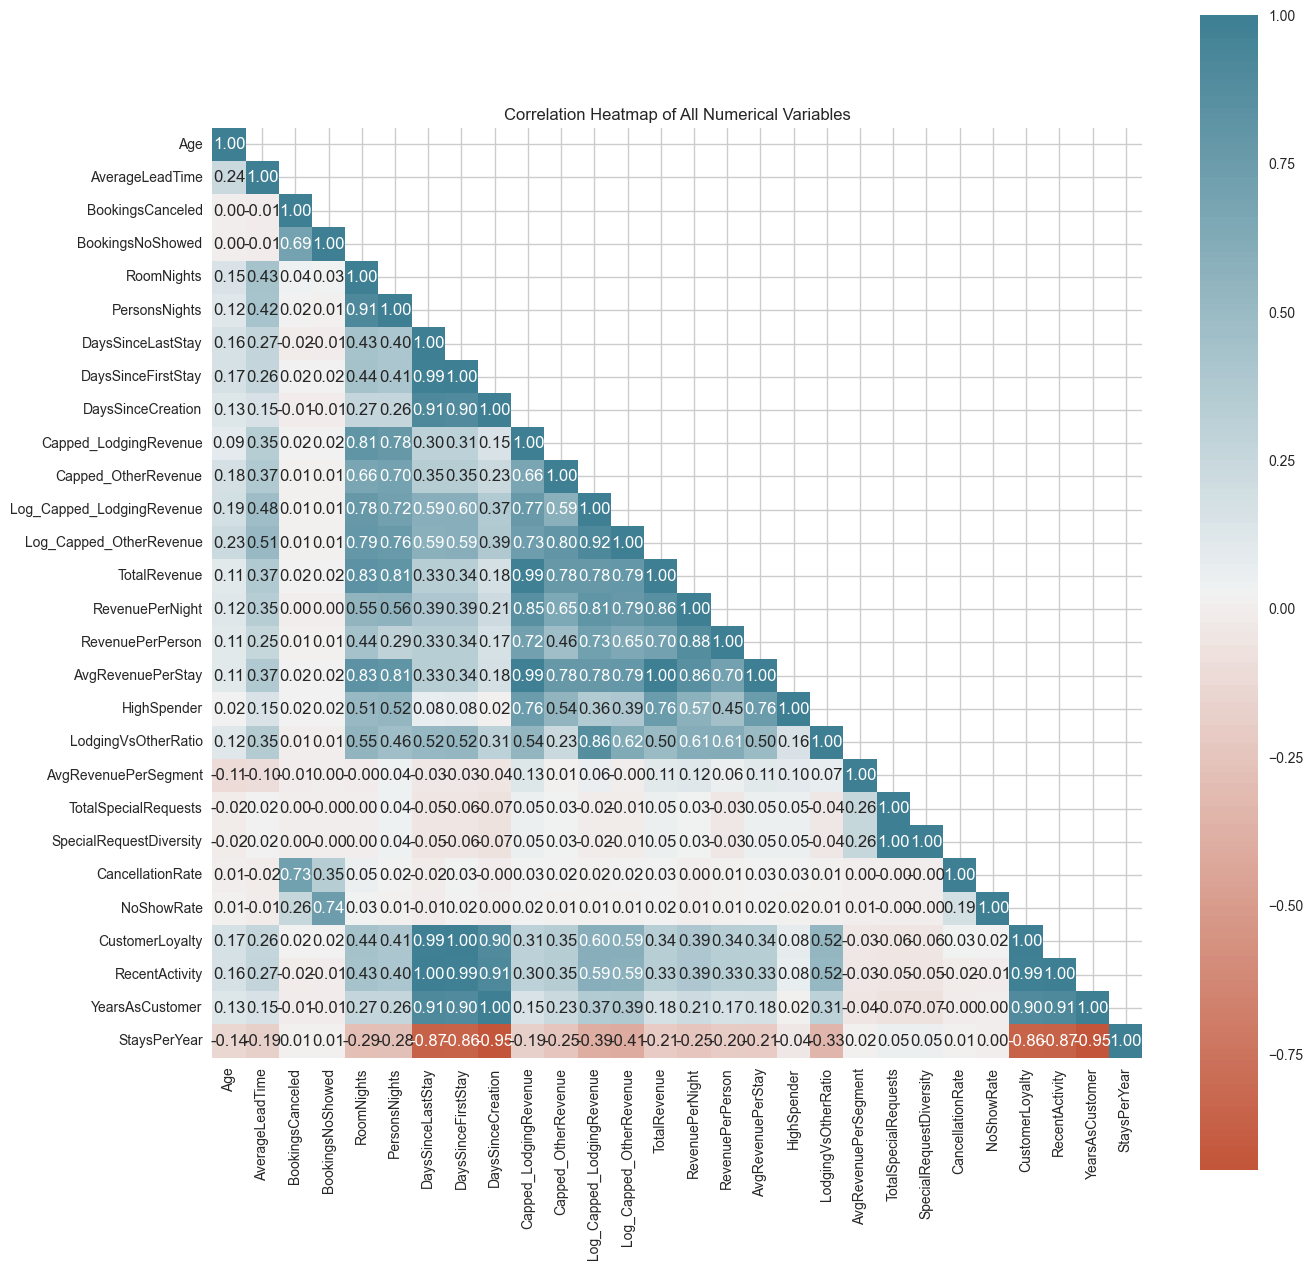

In [111]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns excluding the specified columns
numerical_columns_plot = ['Age', 'AverageLeadTime', 'BookingsCanceled', 'BookingsNoShowed',
                     'RoomNights', 'PersonsNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'DaysSinceCreation',
                     'Capped_LodgingRevenue', 'Capped_OtherRevenue', 'Log_Capped_LodgingRevenue',
                     'Log_Capped_OtherRevenue', 'TotalRevenue', 'RevenuePerNight', 'RevenuePerPerson',
                     'AvgRevenuePerStay', 'HighSpender', 'LodgingVsOtherRatio', 'AvgRevenuePerSegment',
                     'TotalSpecialRequests', 'SpecialRequestDiversity', 'CancellationRate', 'NoShowRate',
                     'CustomerLoyalty', 'RecentActivity', 'YearsAsCustomer', 'StaysPerYear']
numerical_columns_plot_X2 = X2[numerical_columns_plot]
corr_matrix = numerical_columns_plot_X2.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of All Numerical Variables')
plt.show()

#### Other Considerations

In [112]:
# Drop redundact variables - based on all previous analyses
vars_to_drop = ['Log_Capped_LodgingRevenue', 'Log_Capped_OtherRevenue',
                'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 
                'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
                'BookingsCanceled', 'BookingsCheckedIn', 'BookingsNoShowed',
                'DaysSinceFirstStay', 'DaysSinceCreation', 'DaysSinceLastStay',
                'TotalRevenue', 'AvgRevenuePerStay', 'SpecialRequestDiversity', 'YearsAsCustomer']
X2.drop(columns=vars_to_drop, inplace=True)

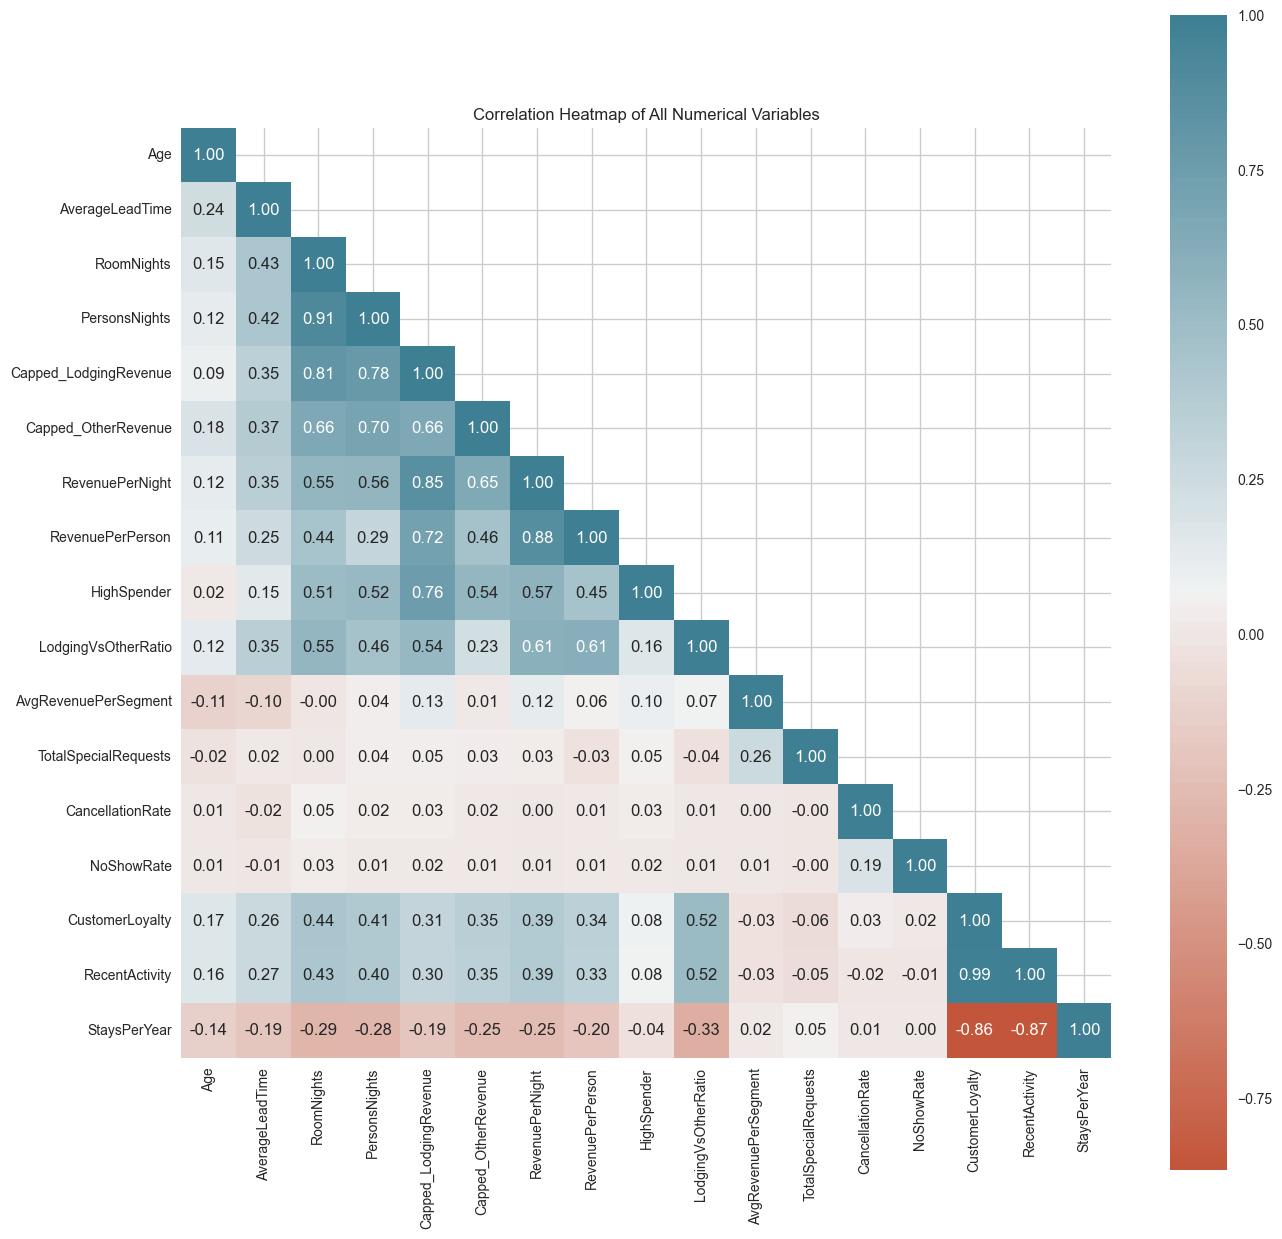

In [113]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns excluding the specified columns
new_numerical_columns_plot = ['Age', 'AverageLeadTime', 'RoomNights', 'PersonsNights', 
                          'Capped_LodgingRevenue', 'Capped_OtherRevenue', 'RevenuePerNight', 
                          'RevenuePerPerson', 'HighSpender', 'LodgingVsOtherRatio', 
                          'AvgRevenuePerSegment', 'TotalSpecialRequests', 
                          'CancellationRate', 'NoShowRate', 'CustomerLoyalty', 'RecentActivity', 'StaysPerYear']
new_numerical_columns_plot_X2 = X2[new_numerical_columns_plot]
corr_matrix = new_numerical_columns_plot_X2.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of All Numerical Variables')
plt.show()

In [114]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nationality            76993 non-null  object 
 1   Age                    76993 non-null  float64
 2   AverageLeadTime        76993 non-null  float64
 3   RoomNights             76993 non-null  float64
 4   PersonsNights          76993 non-null  float64
 5   DistributionChannel    76993 non-null  object 
 6   MarketSegment          76993 non-null  object 
 7   Capped_LodgingRevenue  76993 non-null  float64
 8   Capped_OtherRevenue    76993 non-null  float64
 9   RevenuePerNight        76993 non-null  float64
 10  RevenuePerPerson       76993 non-null  float64
 11  HighSpender            76993 non-null  int32  
 12  LodgingVsOtherRatio    76993 non-null  float64
 13  AvgRevenuePerSegment   76993 non-null  float64
 14  TotalSpecialRequests   76993 non-null  int64  
 15  Ca

####  Conclusion on Remaining Variables:

Based on the latest heatmap and correlation analysis, the remaining features seem to provide unique insights or have reduced multicollinearity to acceptable levels. Here is a final check on the list of features, emphasizing the importance of each:

1. **Nationality**: Provides demographic information
2. **Age**: Crucial demographic variable that influences customer behavior and preferences
3. **AverageLeadTime**: Important for planning and understanding booking behavior
4. **RoomNights**: Identifies the channel through which bookings are made
5. **PersonsNights**: Provides a measure of total nights spent by all individuals
6. **DistributionChannel**: Crucial for marketing and distribution strategy
7. **MarketSegment**: Important for targeted marketing and service customization
8. **Capped_LodgingRevenue**: Key revenue metric for lodging services, important for financial performance analysis
9. **Capped_OtherRevenue**: Key revenue metric for non-lodging services, important for comprehensive revenue analysis
10. **RevenuePerNight**: Provides insights into revenue efficiency per room night
11. **RevenuePerPerson**: Provides insights into revenue efficiency per person
12. **HighSpender**: Binary indicator for high-spending customers
13. **LodgingVsOtherRatio**: Provides insights into the ratio of lodging to other revenues
14. **AvgRevenuePerSegment**: Provides average revenue per market segment
15. **TotalSpecialRequests**: Indicates customer preferences and customization needs
16. **CancellationRate**: Measures the rate of booking cancellations
17. **NoShowRate**: Measures the rate of no-shows
18. **CustomerLoyalty**: Measures loyalty by the ratio of days since first stay to bookings, indicating customer retention
19. **RecentActivity**: Measures recent customer activity by the ratio of days since last stay to bookings, indicating recent engagement
20. **StaysPerYear**: Direct measure of customer frequency of stays on an annual basis

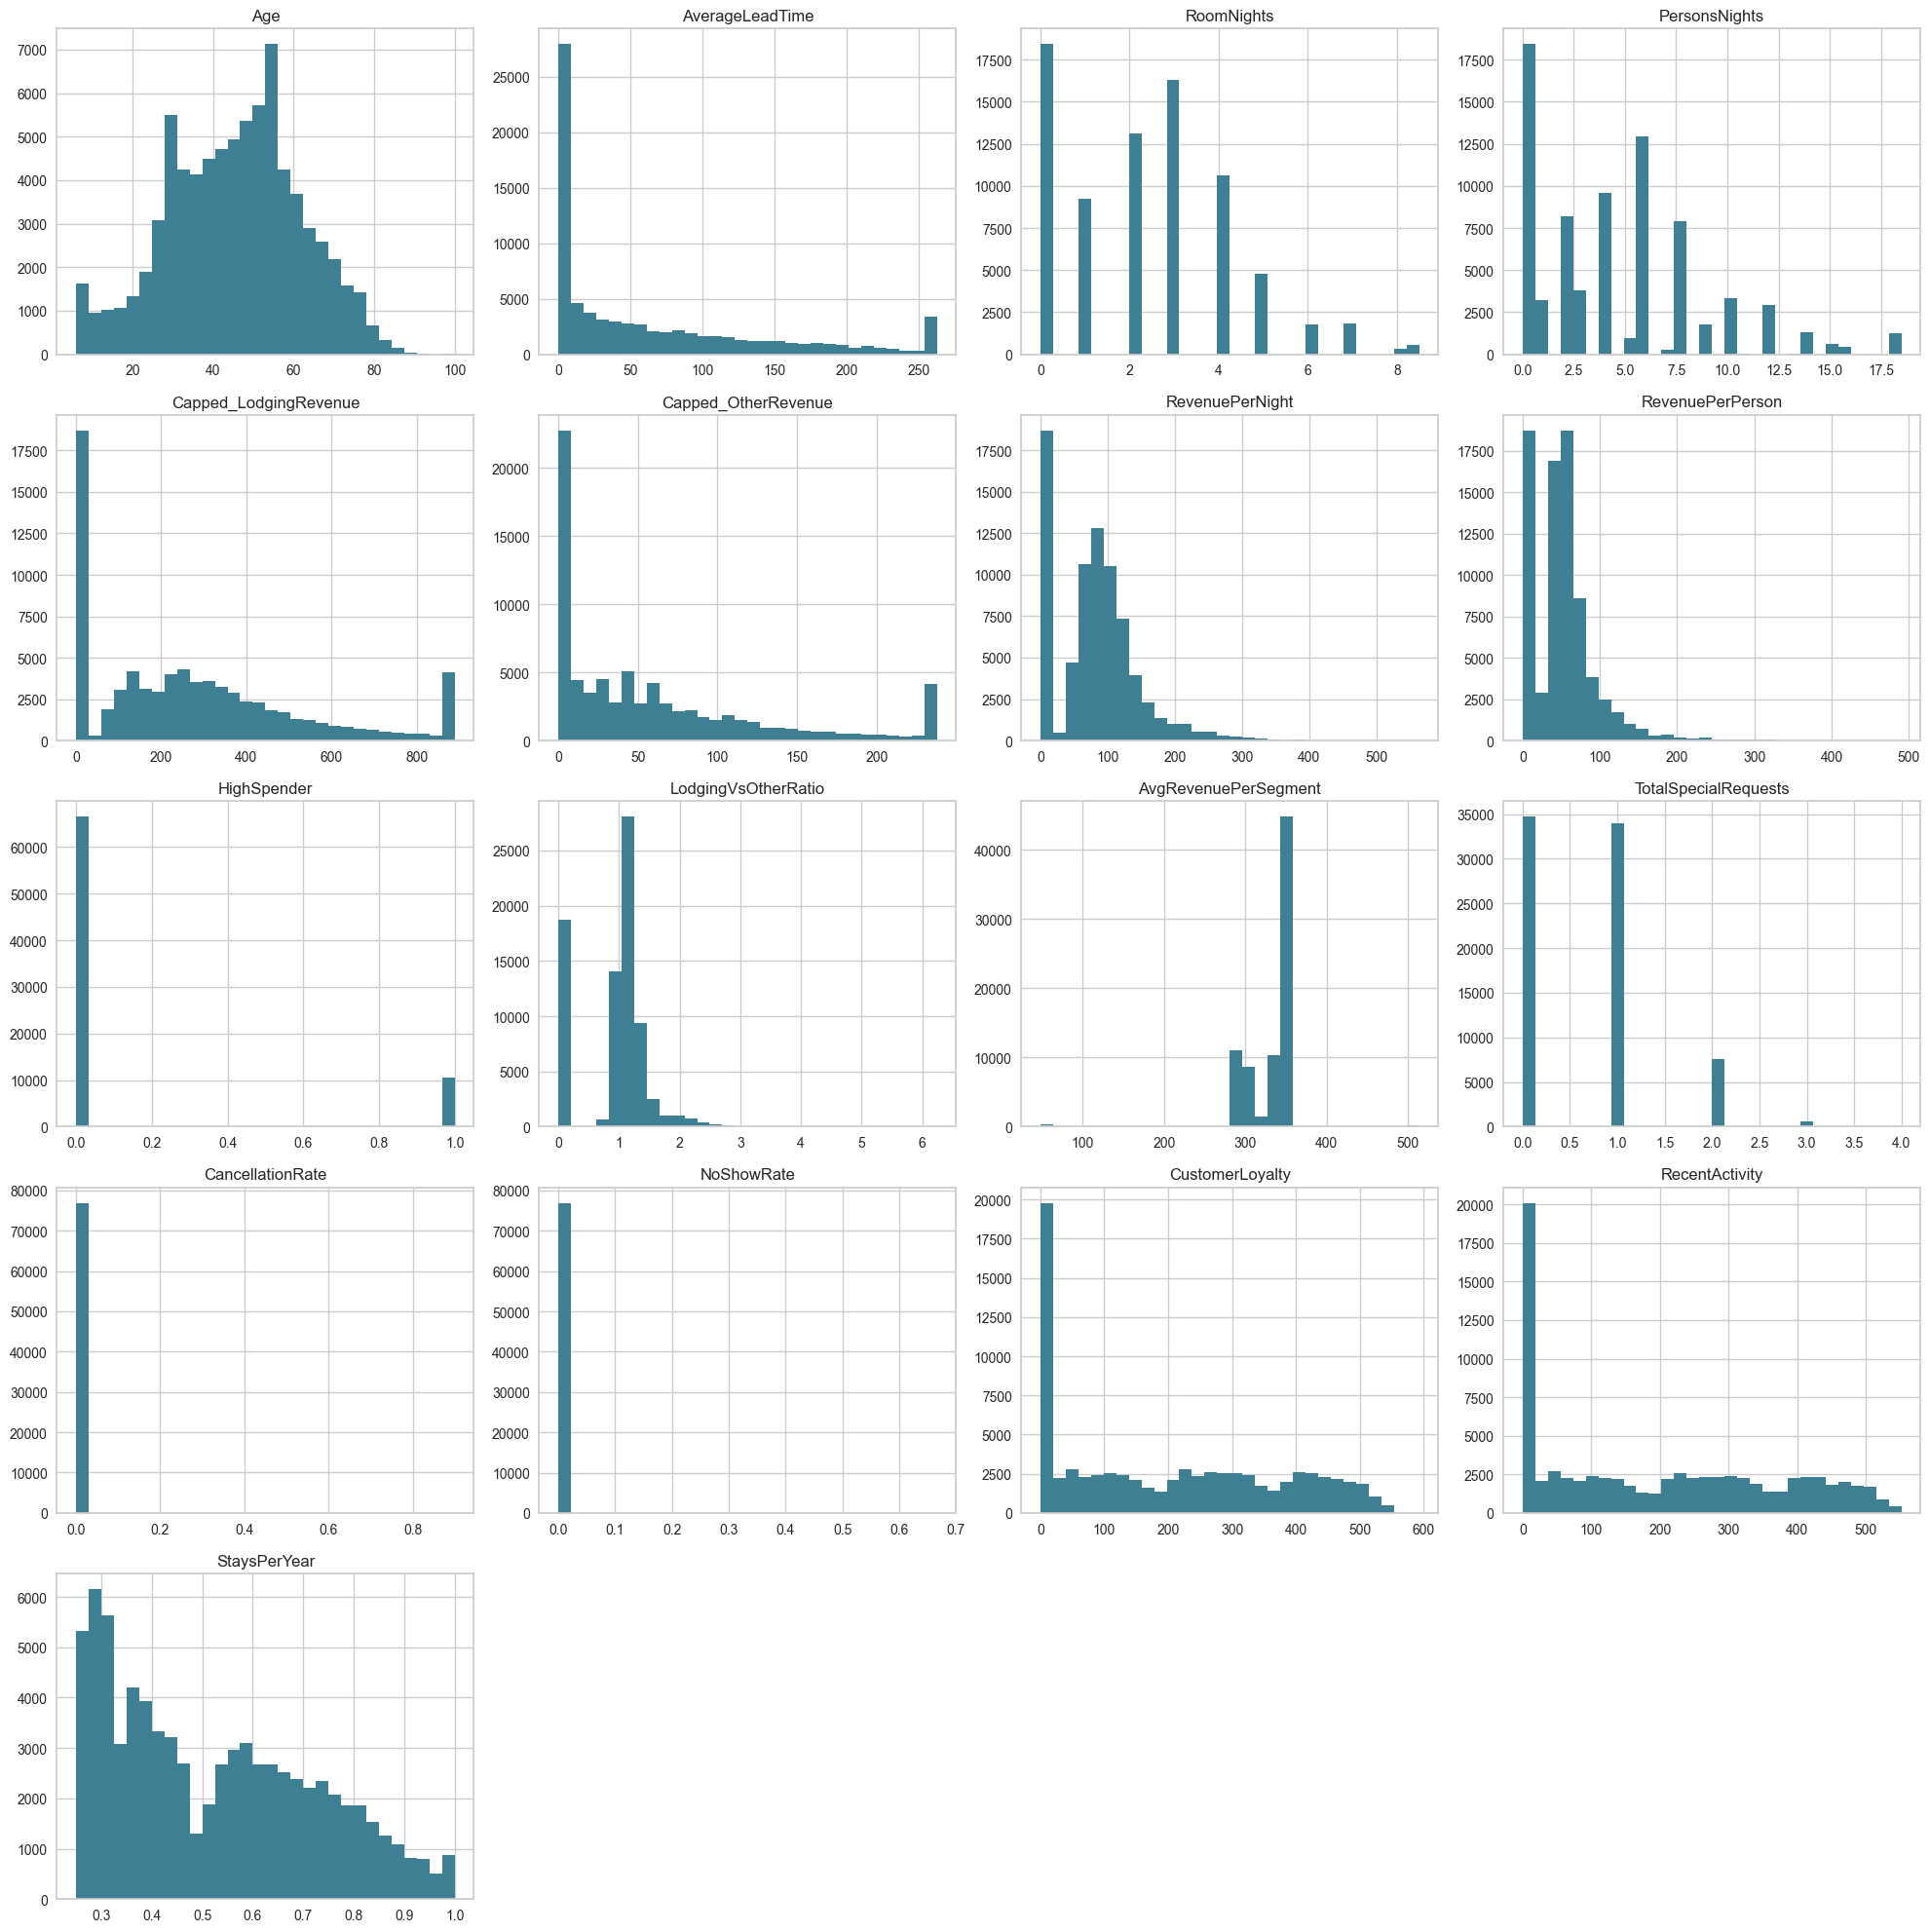

In [115]:
# Plot the distribution of each variable once again

X2.hist(figsize=(20, 20), bins=30, color=color1)
plt.tight_layout()
plt.show()

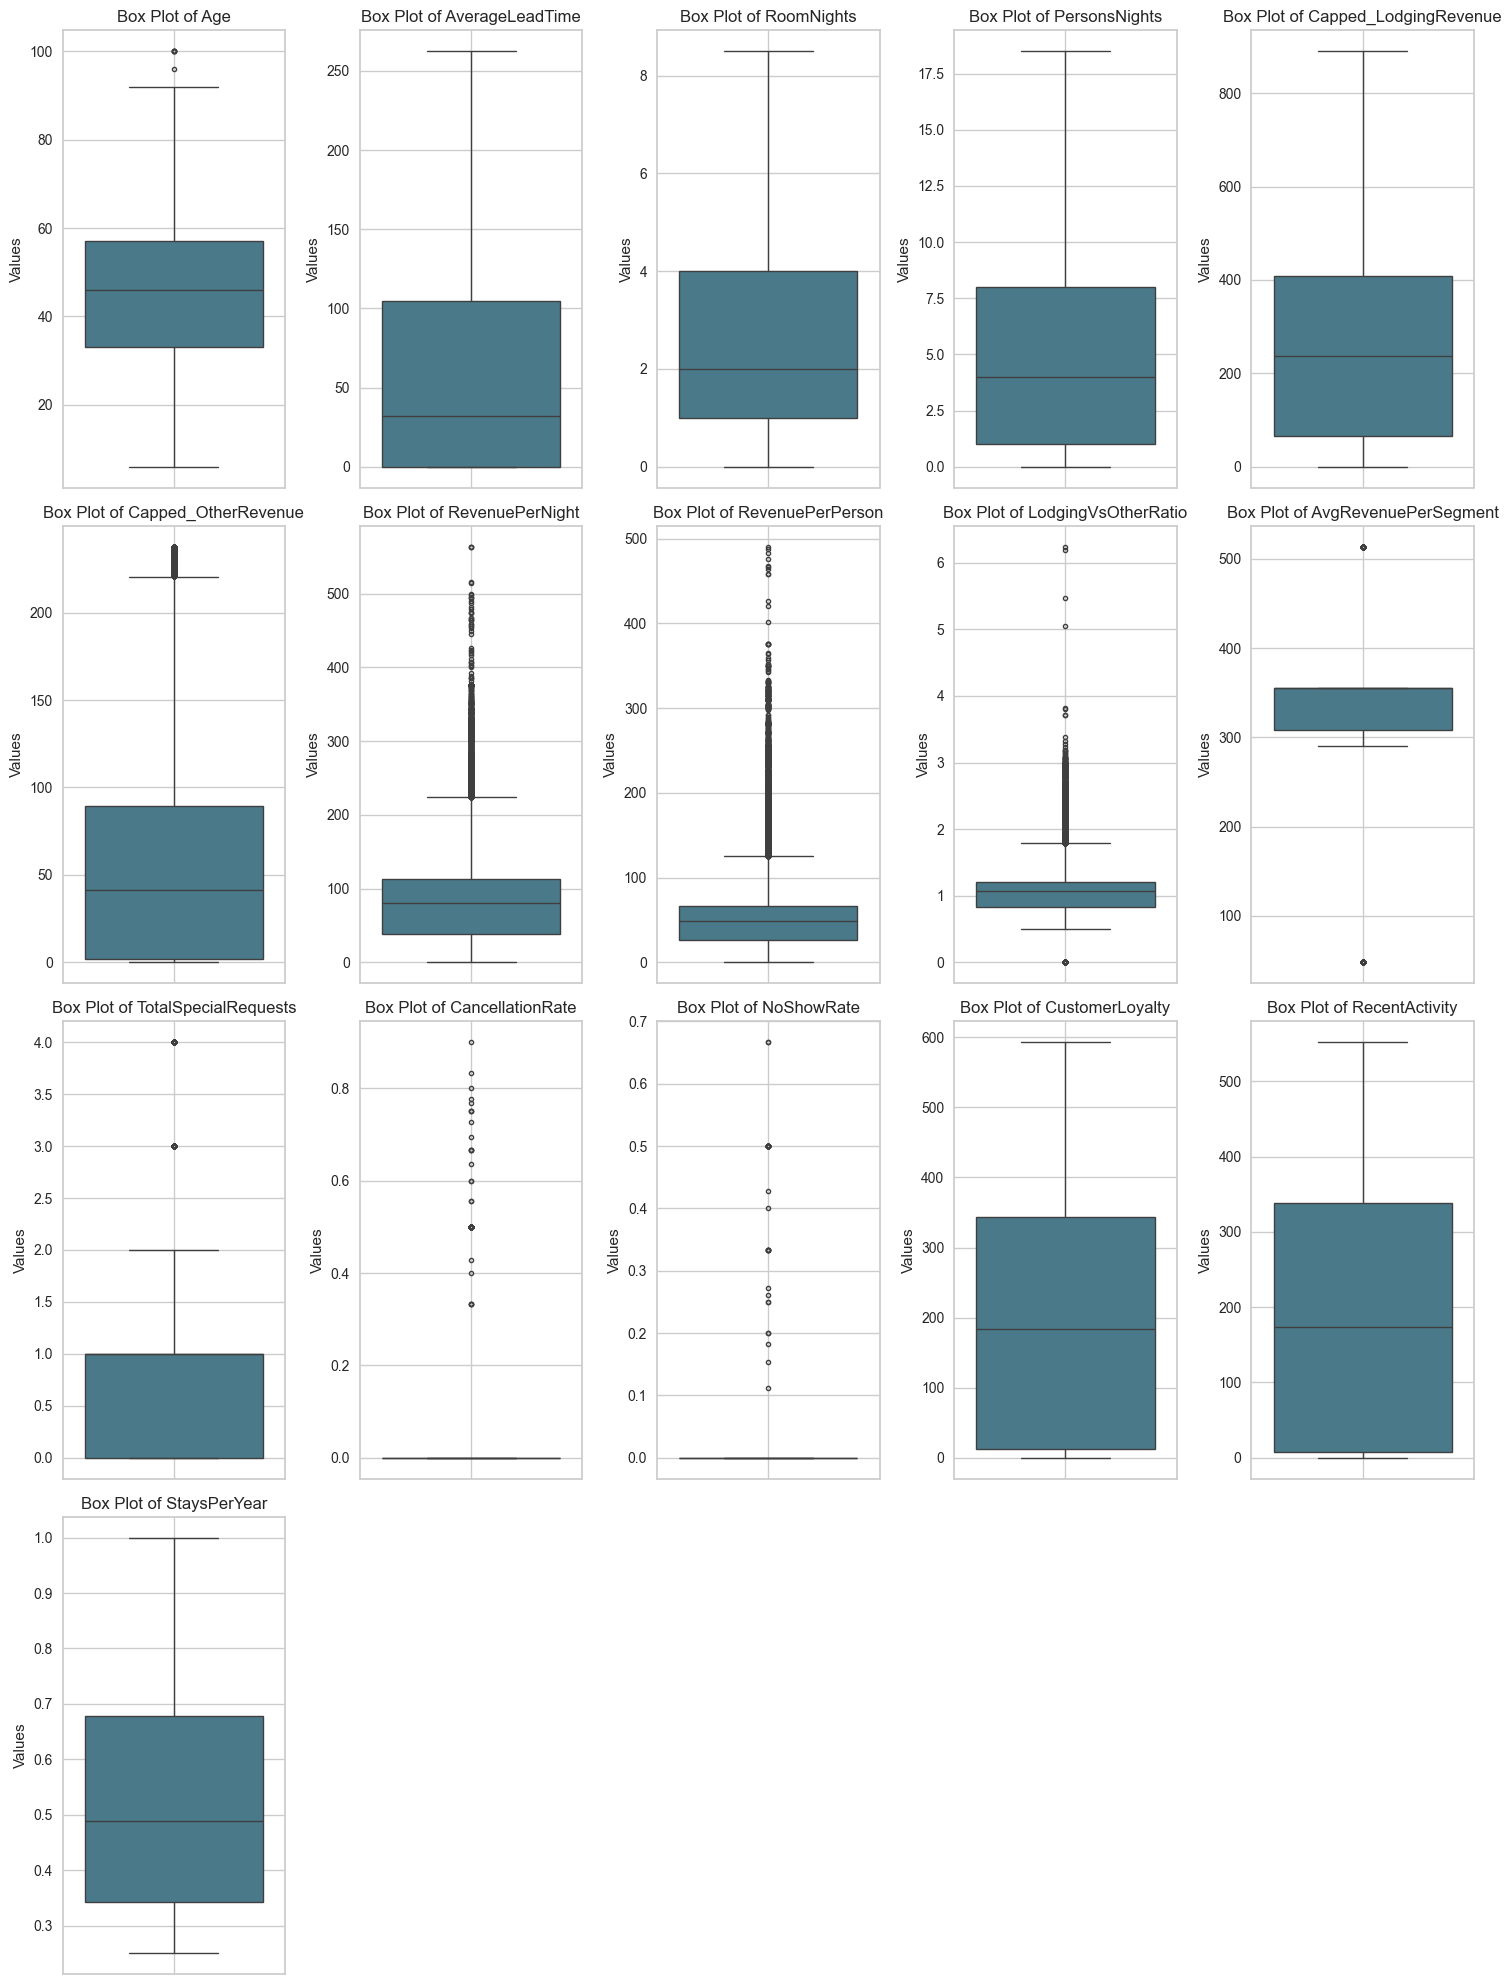

In [116]:
# Compute the Box Plot to analyze outliers

numerical_columns = X2.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns, errors='ignore')

num_cols = 5 
num_rows = (len(numerical_columns.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
for i, col in enumerate(numerical_columns.columns):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=X2[col], color=color1, fliersize=3)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel('Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [117]:
# The histograms and box plots for 'RevenuePerNight' and 'RevenuePerPerson' show that both distributions are right-skewed with significant outliers
# Before moving on to clustering, it's beneficial to treat such distributions to ensure better clustering performance

# Add a small constant (e.g., 1) to avoid log(0)
X2['Log_RevenuePerNight'] = np.log1p(X2['RevenuePerNight'])
X2['Log_RevenuePerPerson'] = np.log1p(X2['RevenuePerPerson'])

# Verify no negative values in the transformed data
print("Minimum value after log transformation (Log_RevenuePerNight):", X2['Log_RevenuePerNight'].min())
print("Minimum value after log transformation (Log_RevenuePerPerson):", X2['Log_RevenuePerPerson'].min())

# Drop original skewed variables
X2.drop(columns=['RevenuePerNight', 'RevenuePerPerson'], inplace=True)

Minimum value after log transformation (Log_RevenuePerNight): 0.0
Minimum value after log transformation (Log_RevenuePerPerson): 0.0


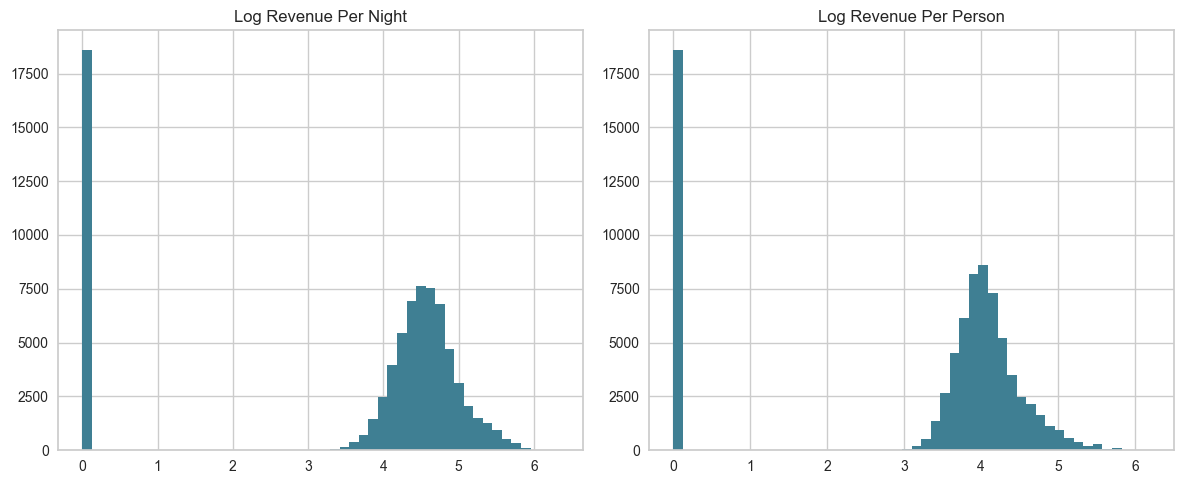

In [118]:
# Plot histograms of transformed variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Log_RevenuePerNight
axes[0].hist(X2['Log_RevenuePerNight'], bins=50, color=color1)
axes[0].set_title('Log Revenue Per Night')

# Histogram of Log_RevenuePerPerson
axes[1].hist(X2['Log_RevenuePerPerson'], bins=50, color=color1)
axes[1].set_title('Log Revenue Per Person')

plt.tight_layout()
plt.show()

In [119]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nationality            76993 non-null  object 
 1   Age                    76993 non-null  float64
 2   AverageLeadTime        76993 non-null  float64
 3   RoomNights             76993 non-null  float64
 4   PersonsNights          76993 non-null  float64
 5   DistributionChannel    76993 non-null  object 
 6   MarketSegment          76993 non-null  object 
 7   Capped_LodgingRevenue  76993 non-null  float64
 8   Capped_OtherRevenue    76993 non-null  float64
 9   HighSpender            76993 non-null  int32  
 10  LodgingVsOtherRatio    76993 non-null  float64
 11  AvgRevenuePerSegment   76993 non-null  float64
 12  TotalSpecialRequests   76993 non-null  int64  
 13  CancellationRate       76993 non-null  float64
 14  NoShowRate             76993 non-null  float64
 15  Cu

# Data Exportation

In [120]:
# Export results
X2.to_excel("hotel_customers_dataset_prepared.xlsx")

# Following Analyses and Conclusions

We've leveraged our newly processed dataset in two distinct notebooks for our analysis. Both notebooks undertake a cluster analysis to address the challenge laid out by A to the marketing department team of the hotel chain. Instead of adhering to traditional hospitality segmentation, our aim is to pioneer a more contemporary, data-driven customer segmentation based on the database of Hotel H.

In both analyses, we opted for PCA as a feature selection method. In one instance, we retained 85% of the variance, resulting in the selection of 19 components from our pool of 37 variables. Following extensive analysis and experimentation, we settled on 5 clusters. In the the other scenario, we maintained 90% of the variance, selecting 20 components from the same set of 37 variables. Similarly, after thorough examination and testing, we opted for 8 clusters.

For both cases, even that in a diferent way, with a different approach, we meticulously interpreted the results and defined tailored marketing strategies accordingly!